# **Projeto - Dados de vendas**

### **Conteúdo:**
1. Análise dos **produtos**, visualizando diferentes características.
2. Análises **temporais**.
3. Análise dos **times de vendas, armazéns**.
4. Análise ds **lucros**.
5. Criação de **função** que retorna **visualizações valiosas** dos **produtos**.


# **Importando as bibliotecas e a base**

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings('ignore')
import statsmodels

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "statsmodels": statsmodels}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
Numpy                |     1.24.3
Pandas               |      1.5.3
Seaborn              |     0.12.2
statsmodels          |     0.14.0


In [218]:
# Importando a base de dados
base = pd.read_csv("US_Regional_Sales_Data.csv")

# **Análises e alterações de características da base:**

- **WarehouseCode:** Código que representa o armazém envolvido no pedido.
- **ProcuredDate:** Data em que os produtos foram adquiridos.
- **OrderDate:** Data em que o pedido foi feito.
- **ShipDate:** Data em que o pedido foi enviado.
- **DeliveryDate:** Data em que o pedido foi entregue.
- **SalesTeamID:** Identificador da equipe de vendas envolvida.
- **CustomerID:** Identificador do cliente.
- **StoreID:** Identificador da loja.
- **ProductID:** Identificador do produto.
- **Order Quantity:** Quantidade de produtos encomendados.
- **Discount Applied:** Desconto aplicado ao pedido.
- **Unit Cost:** Custo de uma única unidade do produto.
- **Unit Price:** Preço pelo qual o produto foi vendido.

In [219]:
# Visualizando a base
base.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [220]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [221]:
# Dados estatísticos das colunas numéricas
base.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


In [222]:
# Quantidade de valores únicos
base.nunique()

OrderNumber         7991
Sales Channel          4
WarehouseCode          6
ProcuredDate          11
OrderDate            945
ShipDate             966
DeliveryDate         966
CurrencyCode           1
_SalesTeamID          28
_CustomerID           50
_StoreID             367
_ProductID            47
Order Quantity         8
Discount Applied       7
Unit Cost           5252
Unit Price           664
dtype: int64

In [223]:
# Quantidade de valores nulos
base.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [224]:
# Quantidade de valores duplicados
base.duplicated().sum()

0

### **Alterando colunas object que deveriam ser numéricas**

In [225]:
base['Unit Cost'] = base['Unit Cost'].str.replace(',','')
base['Unit Price'] = base['Unit Price'].str.replace(',','')
base['Unit Cost'] = pd.to_numeric(base['Unit Cost'])
base['Unit Price'] = pd.to_numeric(base['Unit Price'])

In [226]:
# Visualizando a base
base.head(3)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,1001.18,1963.1
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,3348.66,3939.6
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,1775.5


### **Mudando o tipo das colunas relacionadas a data que estão em object para o tipo date**

In [227]:
base.ProcuredDate = pd.to_datetime(base.ProcuredDate, dayfirst=True)
base.OrderDate = pd.to_datetime(base.OrderDate, dayfirst=True)
base.ShipDate = pd.to_datetime(base.ShipDate, dayfirst=True)
base.DeliveryDate = pd.to_datetime(base.DeliveryDate, dayfirst=True)

In [228]:
# Apagando colunas que não são influentes
base = base.drop(['OrderNumber','CurrencyCode'],axis=1)

In [229]:
# Conferindo as alterações
base[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ProcuredDate  7991 non-null   datetime64[ns]
 1   OrderDate     7991 non-null   datetime64[ns]
 2   ShipDate      7991 non-null   datetime64[ns]
 3   DeliveryDate  7991 non-null   datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 249.8 KB


### Criando coluna com a quantidade de dias entre a data do pedido e a data de envio do produto¶

In [230]:
base['Tempo de envio do produto'] = (base['ShipDate'] - base['OrderDate']).dt.days
base[['OrderDate','DeliveryDate','Tempo de envio do produto']].head(3)

,OrderDate,DeliveryDate,Tempo de envio do produto
0,2018-05-31,2018-06-19,14
1,2018-05-31,2018-07-02,22
2,2018-05-31,2018-07-01,21


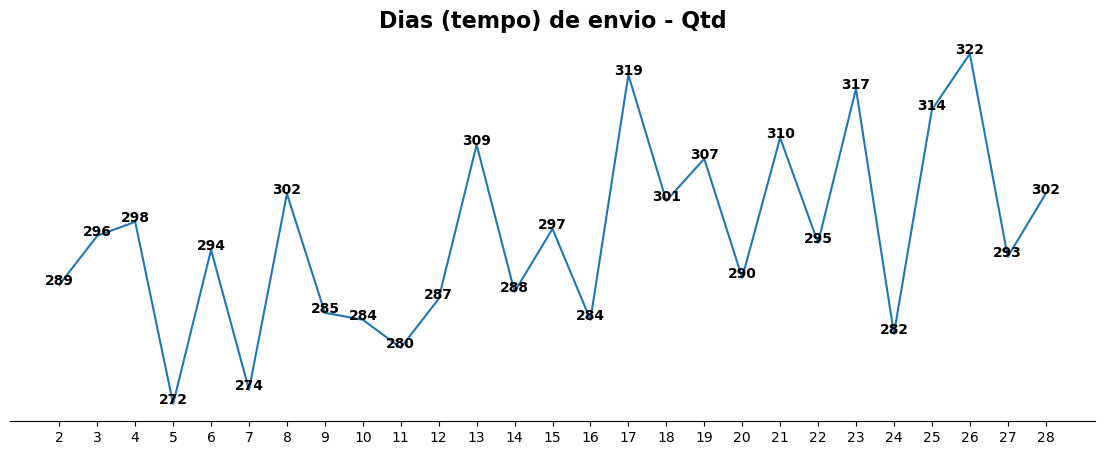

In [231]:
tempo_de_envio = base[['Tempo de envio do produto']].value_counts().sort_index(ascending=True).reset_index()
tempo_de_envio.columns = ['Tempo','Quantidade']
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(tempo_de_envio.Tempo, tempo_de_envio.Quantidade)
ax.set_xticks(np.arange(2,29))
ax.yaxis.set_visible(False)
ax.spines[['top','right','left']].set_visible(False)
for num in np.arange(0,len(tempo_de_envio['Tempo'])):
    ax.annotate(tempo_de_envio['Quantidade'][num],(tempo_de_envio['Tempo'][num],tempo_de_envio['Quantidade'][num]),fontweight='bold', ha='center')
ax.set_title('Dias (tempo) de envio - Qtd', fontsize=16, fontweight='bold')
plt.show()

# **Análises breves de algumas colunas:**

### **Canais de venda:**

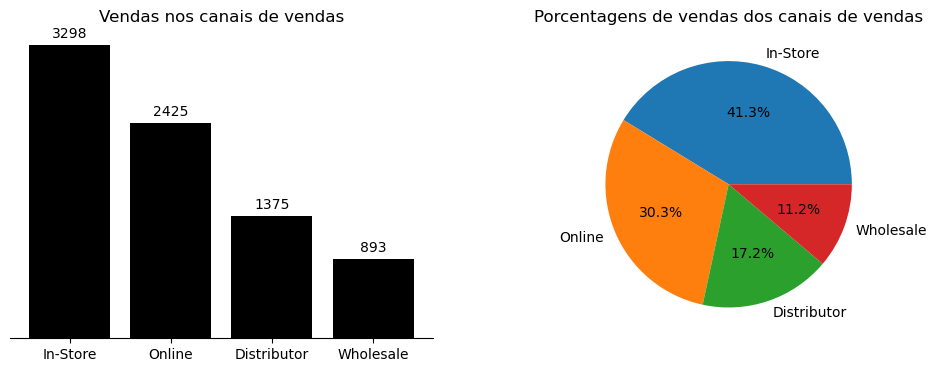

In [232]:
sales_channel_values = base['Sales Channel'].value_counts()
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
ax[0].bar(sales_channel_values.index, sales_channel_values.values, color='black')
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)
for i in range(0,len(sales_channel_values.values)):
    ax[0].annotate(sales_channel_values.values[i],(i,sales_channel_values.values[i]+80),ha='center')
ax[1].pie(sales_channel_values.values, labels=sales_channel_values.index, autopct='%1.1f%%')
ax[0].set_title('Vendas nos canais de vendas')
ax[1].set_title('Porcentagens de vendas dos canais de vendas')
plt.show()

Como podemos ver, a maioria dos pedidos (3298) foram feitos em lojas físicas. Já a minoria (893) em atacados

### **Código do armazém**

In [233]:
# Valores únicos da coluna WarehouseCode
base.WarehouseCode.unique()

array(['WARE-UHY1004', 'WARE-NMK1003', 'WARE-PUJ1005', 'WARE-XYS1001',
       'WARE-MKL1006', 'WARE-NBV1002'], dtype=object)

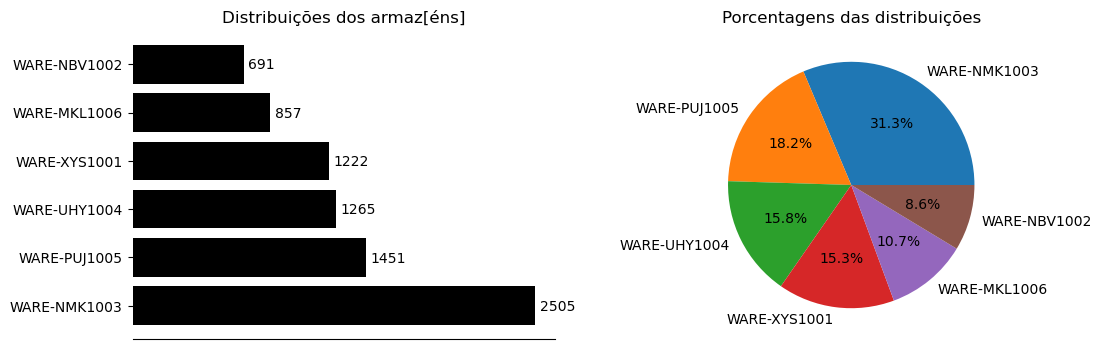

In [234]:
ware_values = base.WarehouseCode.value_counts()
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
ax[0].barh(ware_values.index, ware_values.values, color='black')
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].xaxis.set_visible(False)
for i in range(0,len(ware_values.values)):
    ax[0].annotate(ware_values.values[i],(ware_values.values[i]+27,i-0.1))
ax[1].pie(ware_values.values, labels=ware_values.index, autopct='%1.1f%%')
ax[0].set_title('Distribuições dos armaz[éns]')
ax[1].set_title('Porcentagens das distribuições')
plt.show()

O armazém NMK1003 aparece em primeiro com 2505 distribuições. Por último aparece o NBV1002, com 691.

### **ID - Times de vendas:**

In [235]:
print("Valores nulos na coluna:", base['_SalesTeamID'].isnull().sum())
print("Quantidade de times de vendas:", base['_SalesTeamID'].nunique())

Valores nulos na coluna: 0
Quantidade de times de vendas: 28


In [236]:
base[['_SalesTeamID','_CustomerID','_StoreID','_ProductID']].isnull().sum()

_SalesTeamID    0
_CustomerID     0
_StoreID        0
_ProductID      0
dtype: int64

### **ID - Clientes:**

In [237]:
print("Valores nulos na coluna:", base['_CustomerID'].isnull().sum())
print("Quantidade de valores únicos de ID de clientes:", base['_CustomerID'].nunique())

Valores nulos na coluna: 0
Quantidade de valores únicos de ID de clientes: 50


In [238]:
dez_clientes_com_mais_pedidos = base['_CustomerID'].value_counts().head(10).sort_values(ascending=(True)).reset_index()
dez_clientes_com_menos_pedidos = base['_CustomerID'].value_counts().sort_values(ascending=True).head(10).reset_index()

In [239]:
dez_clientes_com_mais_pedidos.columns = ['ID Cliente','Quantidade de pedidos']
dez_clientes_com_menos_pedidos.columns = ['ID Cliente','Quantidade de pedidos']
dez_clientes_com_mais_pedidos['ID Cliente'] = dez_clientes_com_mais_pedidos['ID Cliente'].astype(str)
dez_clientes_com_menos_pedidos['ID Cliente'] = dez_clientes_com_menos_pedidos['ID Cliente'].astype(str)

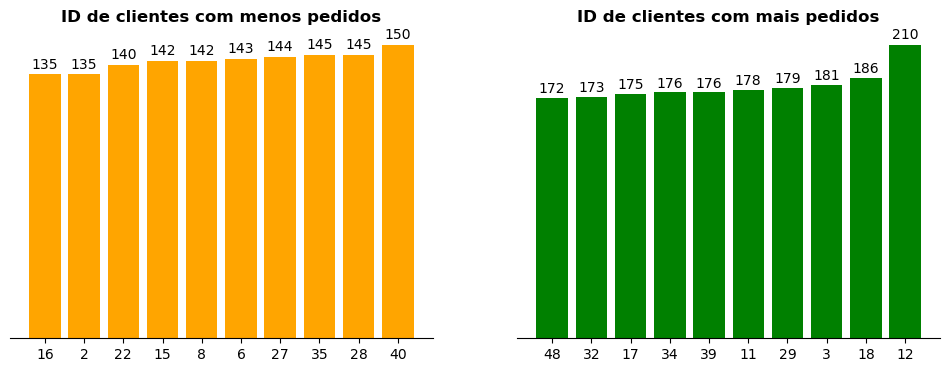

In [240]:
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
ax[1].bar(dez_clientes_com_mais_pedidos['ID Cliente'], dez_clientes_com_mais_pedidos['Quantidade de pedidos'], color='green')
ax[0].bar(dez_clientes_com_menos_pedidos['ID Cliente'], dez_clientes_com_menos_pedidos['Quantidade de pedidos'], color='orange')
ax[1].yaxis.set_visible(False)
ax[1].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].set_title("ID de clientes com menos pedidos", fontweight='bold')
ax[1].set_title("ID de clientes com mais pedidos", fontweight='bold')
for i in np.arange(0, 10):
    ax[1].annotate(dez_clientes_com_mais_pedidos['Quantidade de pedidos'][i], (dez_clientes_com_mais_pedidos['ID Cliente'][i], dez_clientes_com_mais_pedidos['Quantidade de pedidos'][i]+dez_clientes_com_mais_pedidos['Quantidade de pedidos'][i]*0.02), ha='center')
    ax[0].annotate(dez_clientes_com_menos_pedidos['Quantidade de pedidos'][i], (dez_clientes_com_menos_pedidos['ID Cliente'][i], dez_clientes_com_menos_pedidos['Quantidade de pedidos'][i]+dez_clientes_com_menos_pedidos['Quantidade de pedidos'][i]*0.02), ha='center')
plt.show()

### **Analisando o tempo médio de entrega das lojas**

In [241]:
loja_prazo = base.groupby('_StoreID')['Tempo de envio do produto'].mean().sort_values(ascending=False).reset_index()
loja_prazo

,_StoreID,Tempo de envio do produto
0,205,19.428571
1,133,19.100000
2,247,18.880000
3,43,18.833333
4,44,18.500000
...,...,...
362,311,11.619048
363,61,11.368421
364,38,11.294118
365,177,11.272727


# **1. Análises dos produtos**

### **ID dos produtos mais vendidos**

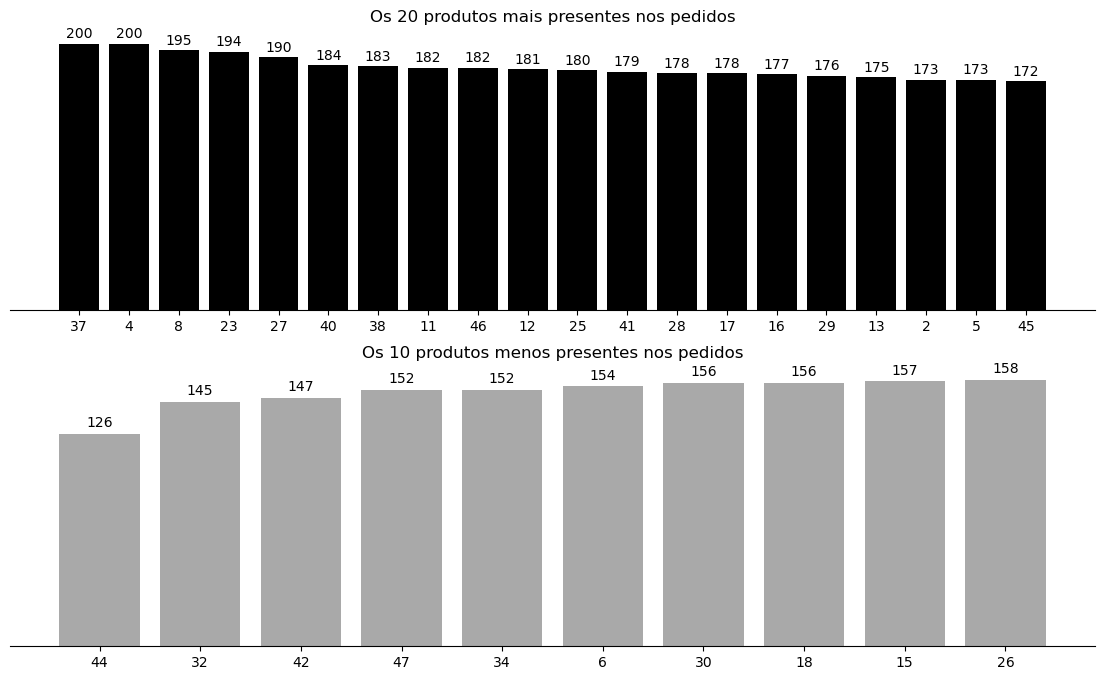

In [242]:
qtd_produtos_vendidos = base._ProductID.value_counts().sort_values(ascending=False).head(20).reset_index().astype('str')
qtd_produtos_vendidos.columns = ['ID','Qtd']
qtd_produtos_vendidos.Qtd = pd.to_numeric(qtd_produtos_vendidos.Qtd)
fig, ax = plt.subplots(nrows=2,figsize=(14,8))
ax[0].bar(qtd_produtos_vendidos.ID, qtd_produtos_vendidos.Qtd, color='black')
ax[0].set_title('Os 20 produtos mais presentes nos pedidos')
ax[0].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)

for i in range(0,len(qtd_produtos_vendidos.Qtd)):
    ax[0].annotate(qtd_produtos_vendidos.Qtd[i], (i, qtd_produtos_vendidos.Qtd[i]+4), ha='center')

#Gráfico 2
qtd_produtos_vendidos = base._ProductID.value_counts().sort_values(ascending=True).head(10).reset_index().astype('str')
qtd_produtos_vendidos.columns = ['ID','Qtd']
qtd_produtos_vendidos.Qtd = pd.to_numeric(qtd_produtos_vendidos.Qtd)
ax[1].bar(qtd_produtos_vendidos.ID, qtd_produtos_vendidos.Qtd, color='darkgrey')
ax[1].set_title('Os 10 produtos menos presentes nos pedidos')
ax[1].spines[['top','left','right']].set_visible(False)
ax[1].yaxis.set_visible(False)

for i in range(0,len(qtd_produtos_vendidos.Qtd)):
    ax[1].annotate(qtd_produtos_vendidos.Qtd[i], (i, qtd_produtos_vendidos.Qtd[i]+4), ha='center')

plt.show()

### **Produtos que mais geraram dinheiro**
Obs: O lucro está no tópico 4

In [243]:
base.groupby('_ProductID')['Unit Price'].sum().sort_values(ascending=False).head(5)

_ProductID
4     485287.7
23    464196.1
37    458400.6
40    438736.1
5     435607.2
Name: Unit Price, dtype: float64

In [244]:
base.groupby('_ProductID')['Order Quantity'].sum().sort_values(ascending=False).head()

_ProductID
23    956
37    896
8     879
4     878
40    855
Name: Order Quantity, dtype: int64

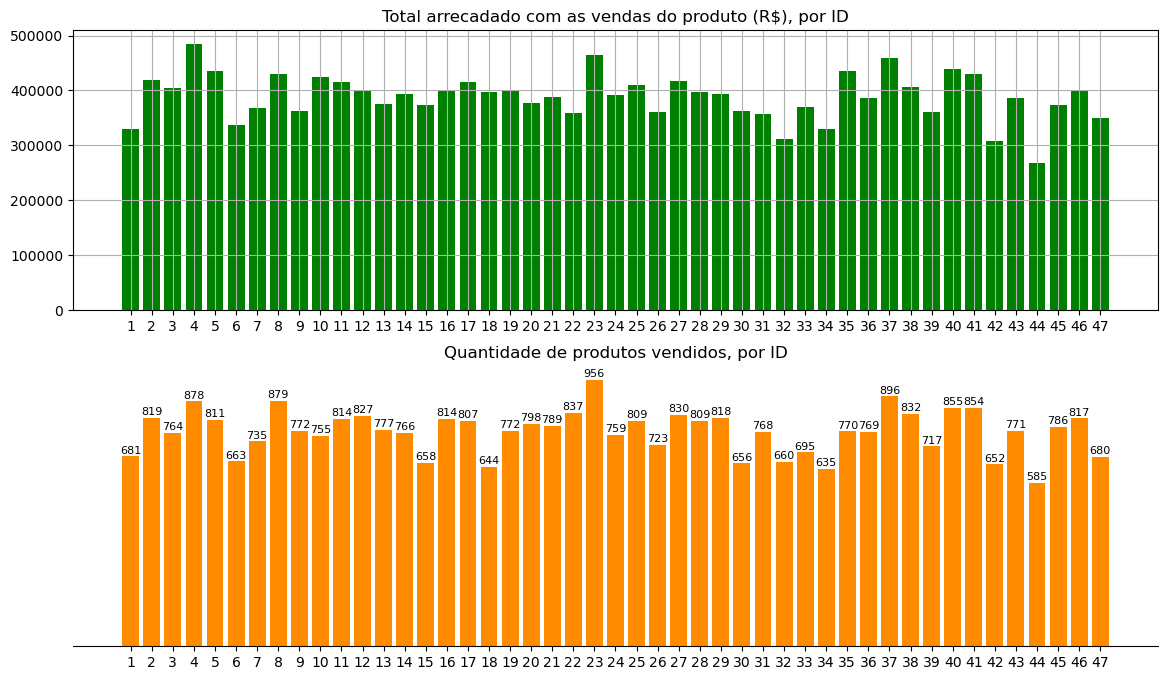

In [245]:
a = base.groupby('_ProductID')['Unit Price'].sum()
b = base.groupby('_ProductID')['Order Quantity'].sum()

fig, ax = plt.subplots(nrows=2,figsize=(14,8))
ax[0].bar(a.index, a.values, color='green')
ax[1].bar(b.index, b.values, color='darkorange')
ax[0].set_title('Total arrecadado com as vendas do produto (R$), por ID')
ax[1].set_title('Quantidade de produtos vendidos, por ID')
ax[0].grid()
#ax[0].spines[['top','left','right']].set_visible(False)
ax[1].spines[['top','left','right']].set_visible(False)
ax[0].set_xticks(a.index)
ax[1].set_xticks(b.index)
ax[1].yaxis.set_visible(False)

for i in range(0,len(b.index)):
    ax[1].annotate(b.values[i],(b.index[i],b.values[i]+10),ha='center',fontsize=8)
plt.show()

### **Quantidade e porcentagem de vendas dos canais de vendas. Percorrendo os produtos do ID 1 ao 10**

ID do Produto: 1


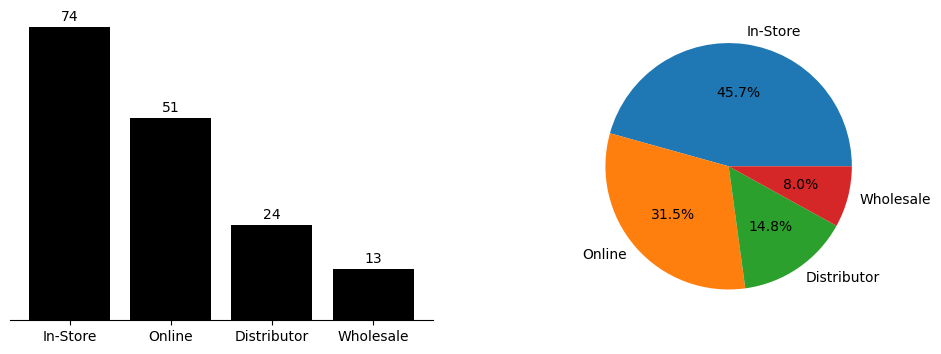

ID do Produto: 2


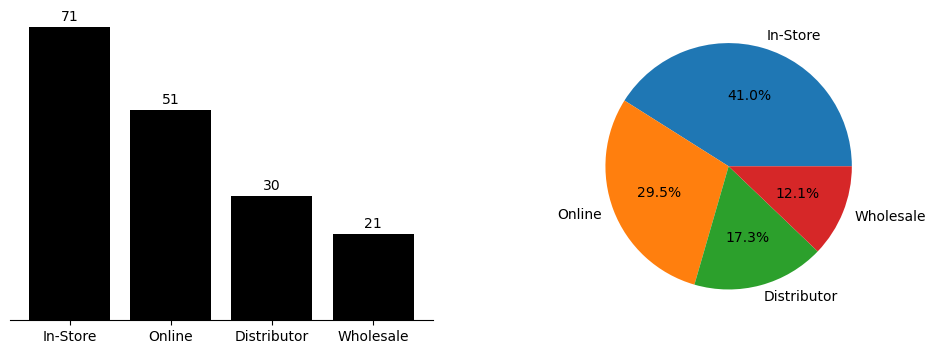

ID do Produto: 3


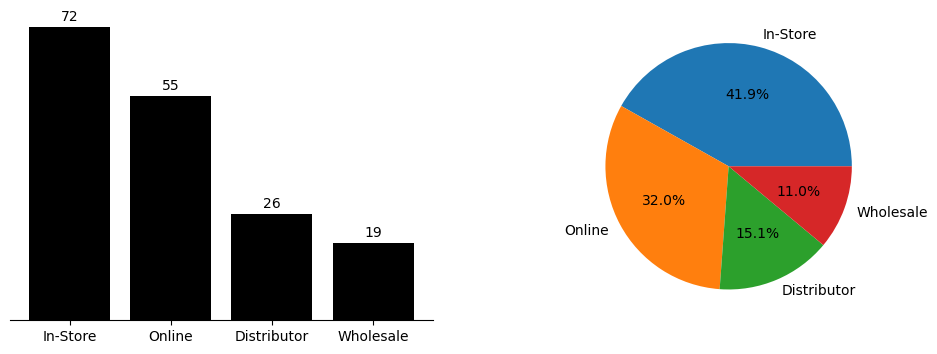

ID do Produto: 4


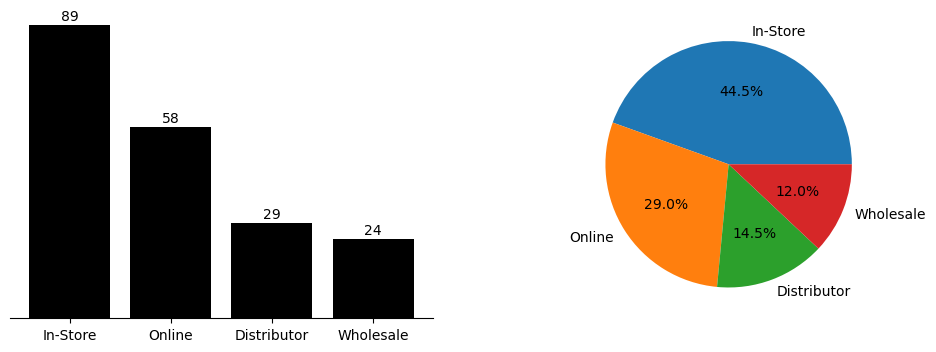

ID do Produto: 5


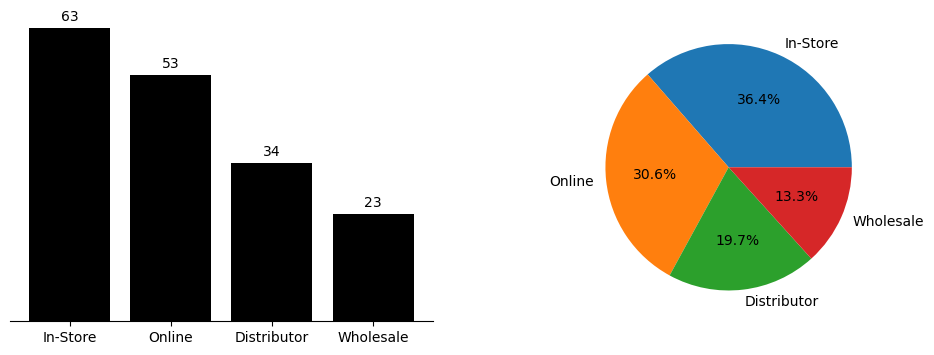

ID do Produto: 6


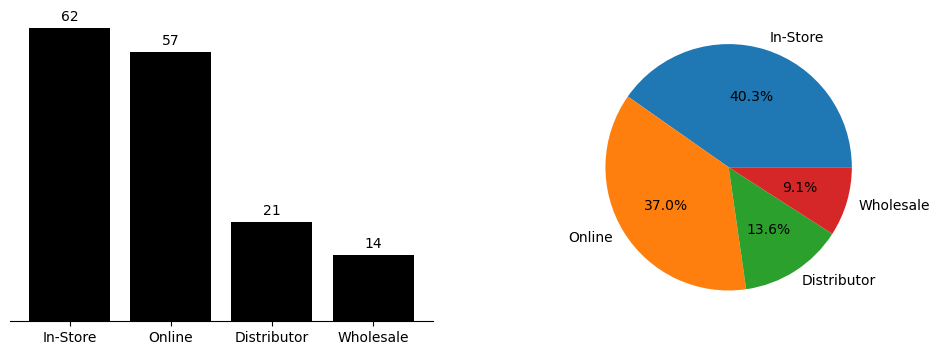

ID do Produto: 7


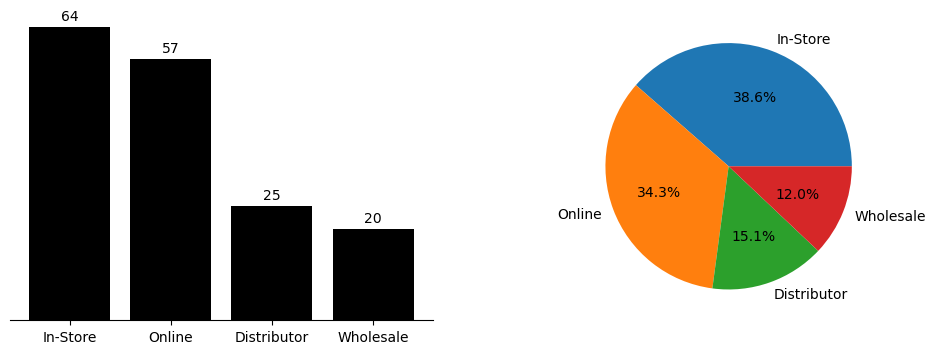

ID do Produto: 8


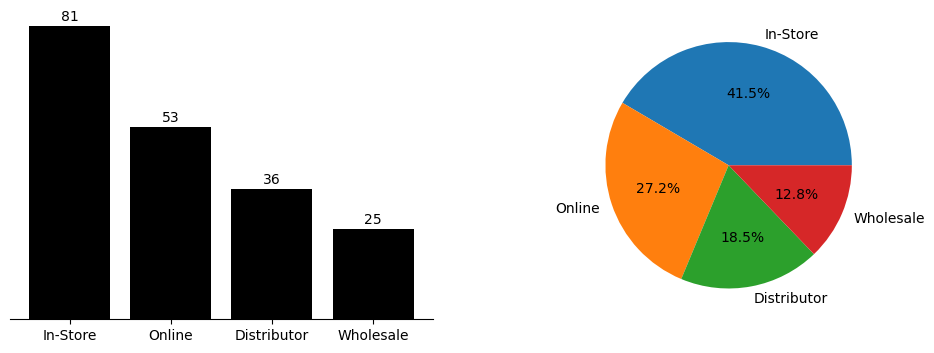

ID do Produto: 9


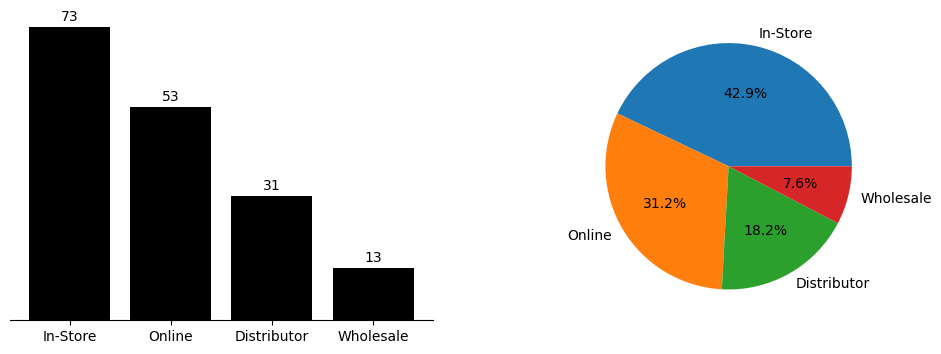

ID do Produto: 10


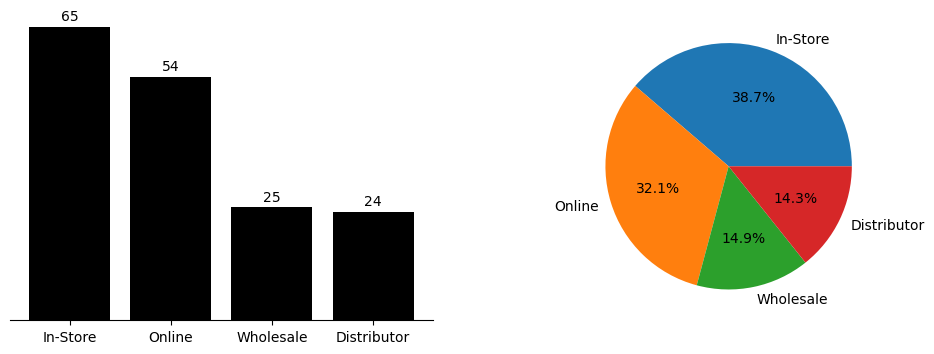

In [246]:
for i in range(1,11):
    base_prod_i = base.loc[base._ProductID == i]
    sales_channel = base_prod_i['Sales Channel'].value_counts()
    print('ID do Produto:', i)
    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    ax[0].bar(sales_channel.index, sales_channel.values, color='black')
    ax[0].spines[['top','left','right']].set_visible(False)
    ax[0].yaxis.set_visible(False)
    for n in range(0,len(sales_channel.index)):
        ax[0].annotate(sales_channel.values[n], (n, sales_channel.values[n]+1.5), ha='center')
    ax[1].pie(sales_channel.values, labels=sales_channel.index, autopct='%1.1f%%')
    plt.show()

### **Criando a base com as quantidades vendidas nos canais de vendas pelo ID do produto**

In [247]:
# Criando 4 bases separadas pelo tipo de Sales Channel
sales_online = base.loc[base['Sales Channel'] == 'Online']
sales_in_store = base.loc[base['Sales Channel'] == 'In-Store']
sales_distributor = base.loc[base['Sales Channel'] == 'Distributor']
sales_wholesale = base.loc[base['Sales Channel'] == 'Wholesale']

In [248]:
# Criando um DF com as quantidades dos _ProductID
sales_online  = pd.DataFrame(sales_online._ProductID.value_counts().sort_index())
sales_in_store  = pd.DataFrame(sales_in_store._ProductID.value_counts().sort_index())
sales_distributor  = pd.DataFrame(sales_distributor._ProductID.value_counts().sort_index())
sales_wholesale  = pd.DataFrame(sales_wholesale._ProductID.value_counts().sort_index())

In [249]:
# Renomeando a coluna
sales_online.columns = ['Qtd_vendidos_online']
sales_in_store.columns = ['Qtd_vendidos_in_store']
sales_distributor.columns = ['Qtd_vendidos_distributor']
sales_wholesale.columns = ['Qtd_vendidos_wholesale']

In [250]:
# Juntando as bases com o concat e criando uma coluna com o total de vendas, somando as colunas
produtos_canais = pd.concat([sales_online, sales_in_store, sales_distributor, sales_wholesale], axis=1)
produtos_canais['Product ID'] = range(1,produtos_canais.shape[0]+1)
produtos_canais['Total de vendas'] = (produtos_canais.Qtd_vendidos_online + produtos_canais.Qtd_vendidos_in_store + produtos_canais.Qtd_vendidos_distributor + produtos_canais.Qtd_vendidos_wholesale)
produtos_canais.head(5)

,Qtd_vendidos_online,Qtd_vendidos_in_store,Qtd_vendidos_distributor,Qtd_vendidos_wholesale,Product ID,Total de vendas
1,51,74,24,13,1,162
2,51,71,30,21,2,173
3,55,72,26,19,3,172
4,58,89,29,24,4,200
5,53,63,34,23,5,173


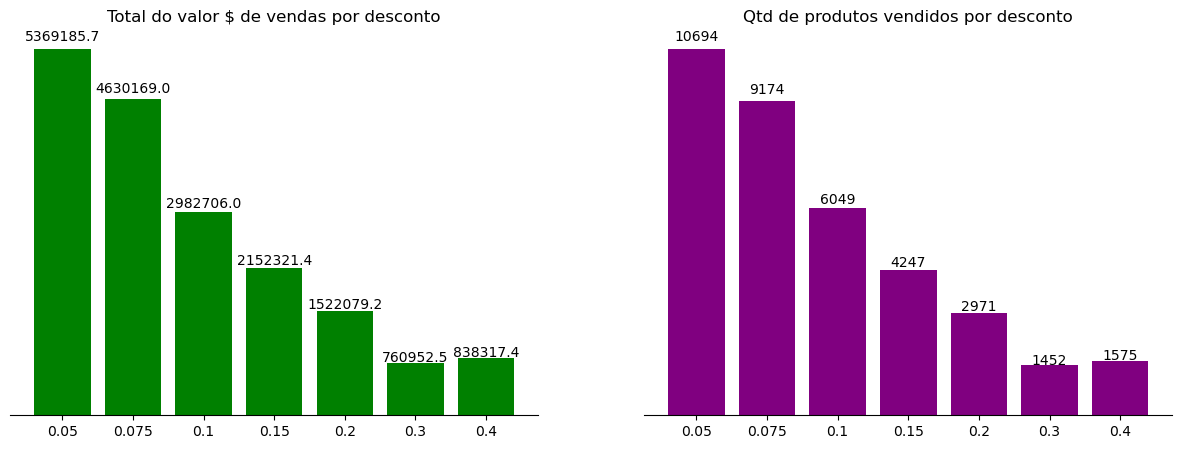

In [251]:
ut = base.groupby('Discount Applied')['Unit Price'].sum()
oq = base.groupby('Discount Applied')['Order Quantity'].sum()
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].bar(ut.index.astype('str'), ut.values, color='green')
ax[1].bar(oq.index.astype('str'), oq.values, color='purple')
ax[0].spines[['top','left','right']].set_visible(False)
ax[1].spines[['top','left','right']].set_visible(False)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
for i in range(0,len(ut.index)):
    ax[0].annotate(ut.values[i], (i,ut.values[i]+(ut.values[i]*0.02)),ha='center')
    ax[1].annotate(oq.values[i], (i,oq.values[i]+(oq.values[i]*0.02)),ha='center')

ax[0].set_title('Total do valor $ de vendas por desconto')
ax[1].set_title('Qtd de produtos vendidos por desconto')
plt.show()

# **2. Análises Temporais**

### **Criando uma base separada com as datas, para análise dos dias, meses e anos**

In [252]:
base_datas = base[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']]
base_datas['ProcuredDate_dia'] = base_datas.ProcuredDate.dt.day
base_datas['ProcuredDate_mes'] = base_datas.ProcuredDate.dt.month
base_datas['ProcuredDate_ano'] = base_datas.ProcuredDate.dt.year
base_datas['OrderDate_dia'] = base_datas.OrderDate.dt.day
base_datas['OrderDate_mes'] = base_datas.OrderDate.dt.month
base_datas['OrderDate_ano'] = base_datas.OrderDate.dt.year
base_datas['ShipDate_dia'] = base_datas.ShipDate.dt.day
base_datas['ShipDate_mes'] = base_datas.ShipDate.dt.month
base_datas['ShipDate_ano'] = base_datas.ShipDate.dt.year
base_datas['DeliveryDate_dia'] = base_datas.DeliveryDate.dt.day
base_datas['DeliveryDate_mes'] = base_datas.DeliveryDate.dt.month
base_datas['DeliveryDate_ano'] = base_datas.DeliveryDate.dt.year
base_datas = base_datas.drop(['ProcuredDate','OrderDate','ShipDate','DeliveryDate'],axis=1)

In [253]:
# Visualizando
base_datas.head(3)

,ProcuredDate_dia,ProcuredDate_mes,ProcuredDate_ano,OrderDate_dia,OrderDate_mes,OrderDate_ano,ShipDate_dia,ShipDate_mes,ShipDate_ano,DeliveryDate_dia,DeliveryDate_mes,DeliveryDate_ano
0,31,12,2017,31,5,2018,14,6,2018,19,6,2018
1,31,12,2017,31,5,2018,22,6,2018,2,7,2018
2,31,12,2017,31,5,2018,21,6,2018,1,7,2018


- **Dias do mês que mais pedidos**
- **Dias do mês que menos tiveram pedidos**

In [254]:
print(base_datas.OrderDate_dia.value_counts().sort_values(ascending=False).head(5))
print(base_datas.OrderDate_dia.value_counts().sort_values(ascending=True).head(5))

4     292
14    284
21    283
18    277
15    274
Name: OrderDate_dia, dtype: int64
31    161
16    230
5     234
13    238
6     240
Name: OrderDate_dia, dtype: int64


In [255]:
ano_2018 = base_datas.loc[base_datas.OrderDate_ano == 2018]
ano_2019 = base_datas.loc[base_datas.OrderDate_ano == 2019]
ano_2020 = base_datas.loc[base_datas.OrderDate_ano == 2020]

mes_2018 = ano_2018.OrderDate_mes.value_counts().sort_index()
mes_2019 = ano_2019.OrderDate_mes.value_counts()
mes_2020 = ano_2020.OrderDate_mes.value_counts()

### **Como podemos ver abaixo, a quantidade de pedidos registrados começaram a ser registradas no fim de maio para o ínicio de junho do anos de 2018**

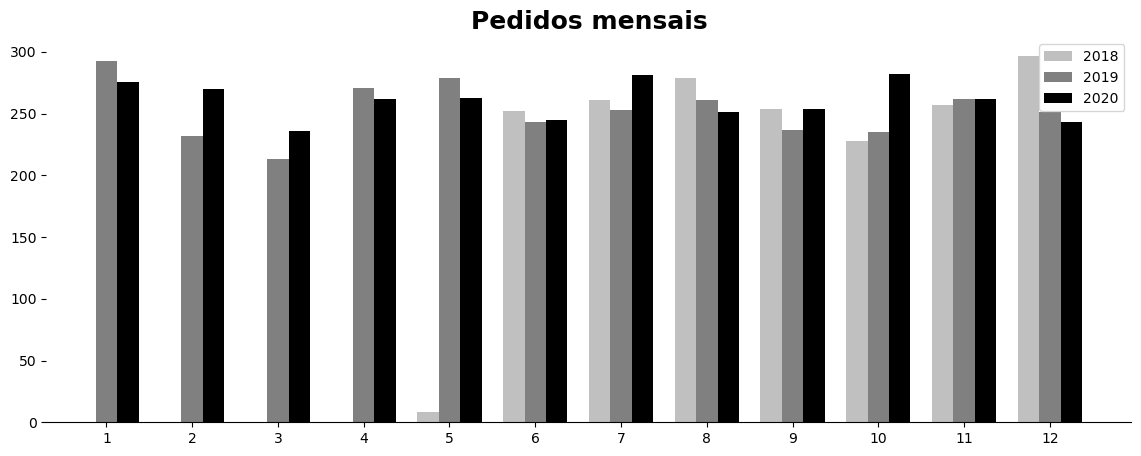

In [256]:
fig, ax = plt.subplots(figsize=(14,5))
w=0.25
ax.bar(mes_2018.index-w, mes_2018.values, width=w, color='silver', label='2018')
ax.bar(mes_2019.index, mes_2019.values, width=w, color='grey', label='2019')
ax.bar(mes_2020.index+w, mes_2020.values, width=w, color='black', label='2020')
ax.set_xticks(mes_2019.index)
ax.set_title('Pedidos mensais', fontsize=18, fontweight='bold')
ax.legend()
ax.spines[['top','left','right']].set_visible(False)
plt.show()

Analisando a base acima, conseguimos ver que a contagem das vendas iniciaram no mês 5 em 2018

### **Quantidade de pedidos agrupados pelos dias**
- **Podemos notar que o 31 está bem abaixo, e isso ocorre pois alguns meses não possuem o dia 31, não havendo registros**

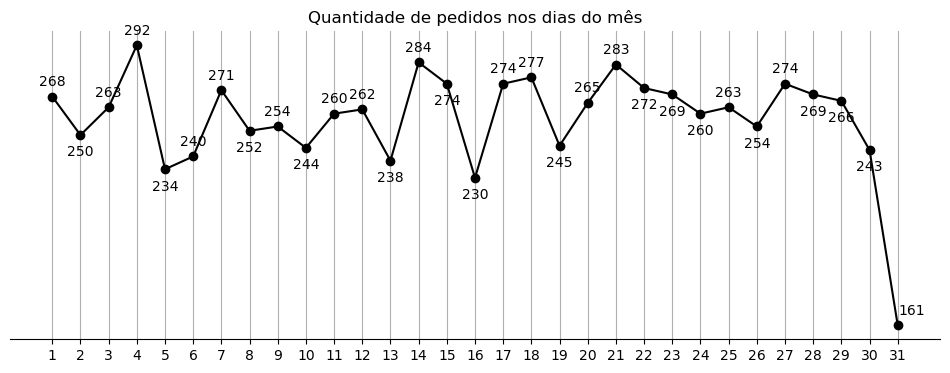

In [257]:
dias_ped = base_datas.OrderDate_dia.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(dias_ped.index, dias_ped.values,'o-',color='black')
ax.set_xticks(dias_ped.index)
ax.spines[['top','left','right']].set_visible(False)

for i in range(0,len(dias_ped.index)):
    if dias_ped.values[i] > dias_ped.values[i-1]:
        ax.annotate(dias_ped.values[i], (dias_ped.index[i], dias_ped.values[i]+5),ha='center')
    else:
        ax.annotate(dias_ped.values[i], (dias_ped.index[i], dias_ped.values[i]-10),ha='center')


ax.annotate(dias_ped.values[30],(dias_ped.index[30]+0.5,dias_ped.values[30]+5),ha='center')
ax.yaxis.set_visible(False)
ax.set_title('Quantidade de pedidos nos dias do mês')
ax.grid()
plt.show()

In [258]:
base_datas = base_datas.loc[(base_datas.OrderDate_ano == 2019) | (base_datas.OrderDate_ano == 2020)]

### **Quantidade de pedidos agrupados pelos meses**

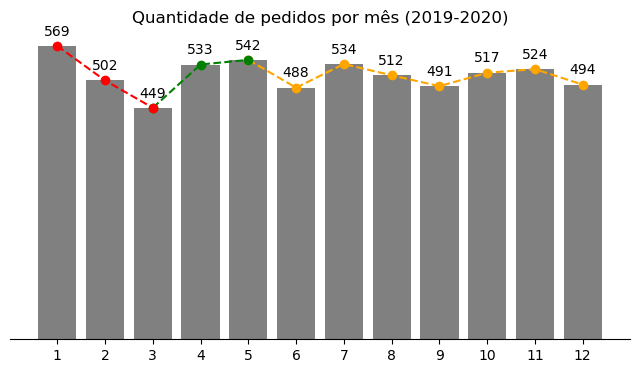

In [259]:
mes_ped = base_datas.OrderDate_mes.value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8,4))
media_meses = base_datas.OrderDate_mes.value_counts().mean()
ax.bar(mes_ped.index, mes_ped.values, color='gray')
ax.set_xticks(mes_ped.index)
ax.spines[['top','left','right']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_title('Quantidade de pedidos por mês (2019-2020)')
ax.plot(mes_ped.index[4:],mes_ped.values[4:],'o--',color='orange')
ax.plot(mes_ped.index[2:5],mes_ped.values[2:5],'og--')
ax.plot(mes_ped.index[0:3],mes_ped.values[0:3],'or--')
for i in range(0,len(mes_ped.index)):
    ax.annotate(mes_ped.values[i], (mes_ped.index[i],mes_ped.values[i]+20),ha='center')
plt.show()

**Agrupando a base por mês e ano**

In [260]:
base_datas2 = base[['ProcuredDate','OrderDate','ShipDate','DeliveryDate']]

In [261]:
base_2018 = base_datas.loc[base_datas.OrderDate_ano == 2018]
base_2019 = base_datas.loc[base_datas.OrderDate_ano == 2019]
base_2020 = base_datas.loc[base_datas.OrderDate_ano == 2020]

dias_2018 = base_2018.OrderDate_dia.value_counts().sort_index()
mes_2018 = base_2018.OrderDate_mes.value_counts().sort_index()
dias_2019 = base_2019.OrderDate_dia.value_counts().sort_index()
mes_2019 = base_2019.OrderDate_mes.value_counts().sort_index()
dias_2020 = base_2020.OrderDate_dia.value_counts().sort_index()
mes_2020 = base_2020.OrderDate_mes.value_counts().sort_index()

### **Visualizando o total de pedidos, agrupando por dia e ano**
- **Apenas 2019 e 2020**

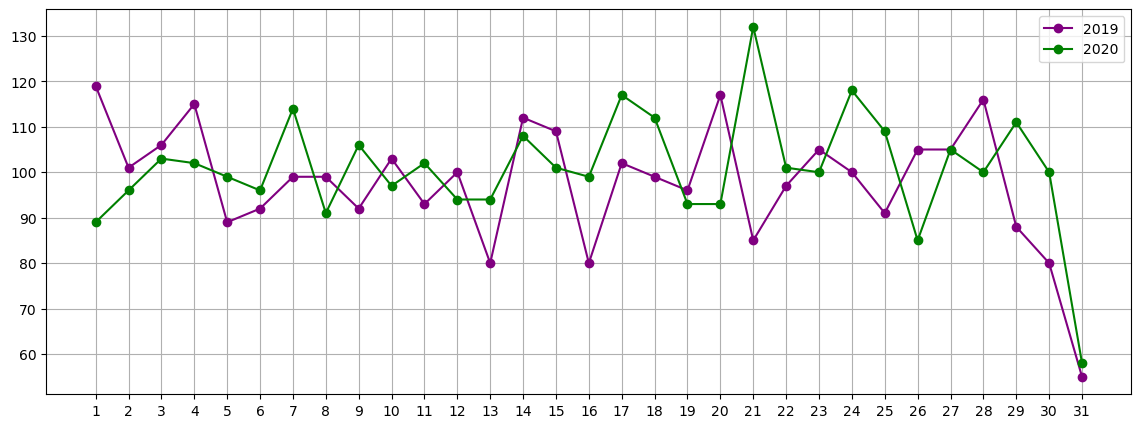

In [262]:
fig, ax = plt.subplots(figsize=(14,5))

ax.plot(dias_2019.index, dias_2019.values,'o-', color='purple',label='2019')
ax.plot(dias_2020.index, dias_2020.values,'o-', color='green',label='2020')
ax.set_xticks(dias_2019.index)
ax.grid()
ax.legend()
plt.show()

In [263]:
base2 = base[['Sales Channel','WarehouseCode','OrderDate','Order Quantity', 'Discount Applied','Unit Cost', 'Unit Price']]
base2

,Sales Channel,WarehouseCode,OrderDate,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,In-Store,WARE-UHY1004,2018-05-31,5,0.075,1001.18,1963.1
1,Online,WARE-NMK1003,2018-05-31,3,0.075,3348.66,3939.6
2,Distributor,WARE-UHY1004,2018-05-31,1,0.050,781.22,1775.5
3,Wholesale,WARE-NMK1003,2018-05-31,8,0.075,1464.69,2324.9
4,Distributor,WARE-NMK1003,2018-05-31,8,0.100,1476.14,1822.4
...,...,...,...,...,...,...,...
7986,In-Store,WARE-MKL1006,2020-12-30,1,0.075,121.94,234.5
7987,Online,WARE-NMK1003,2020-12-30,6,0.050,1921.56,3202.6
7988,Online,WARE-UHY1004,2020-12-30,5,0.200,2792.76,3825.7
7989,Online,WARE-NMK1003,2020-12-30,8,0.100,804.00,1072.0


In [264]:
base2['Ano'] = base2.OrderDate.dt.year
base3 = base2.loc[(base2.Ano == 2019) | (base2.Ano == 2020),['OrderDate','Order Quantity', 'Unit Cost', 'Unit Price', 'Discount Applied']]
base3['Trimestre'] = base3.OrderDate.dt.quarter

# base2['Dia_Semana'] = base2['OrderDate'].dt.weekday # Se é segunda, terça... retorna 0,1,2,3,4,5,6
dias_br = {'Monday':'Segunda-feira',
           'Tuesday':'Terça-feira',
           'Wednesday':'Quarta-feira',
           'Thursday':'Quinta-feira',
           'Friday':'Sexta-feira',
           'Saturday':'Sábado',
           'Sunday':'Domingo',}

base2['Dia_Semana'] = base2['OrderDate'].dt.weekday
base2['Dia_Semana_nome'] = base2['OrderDate'].dt.day_name().replace(dias_br)
base2[['Dia_Semana','Dia_Semana_nome']].head(3)
# 0-Segunda...6-Domingo

,Dia_Semana,Dia_Semana_nome
0,3,Quinta-feira
1,3,Quinta-feira
2,3,Quinta-feira


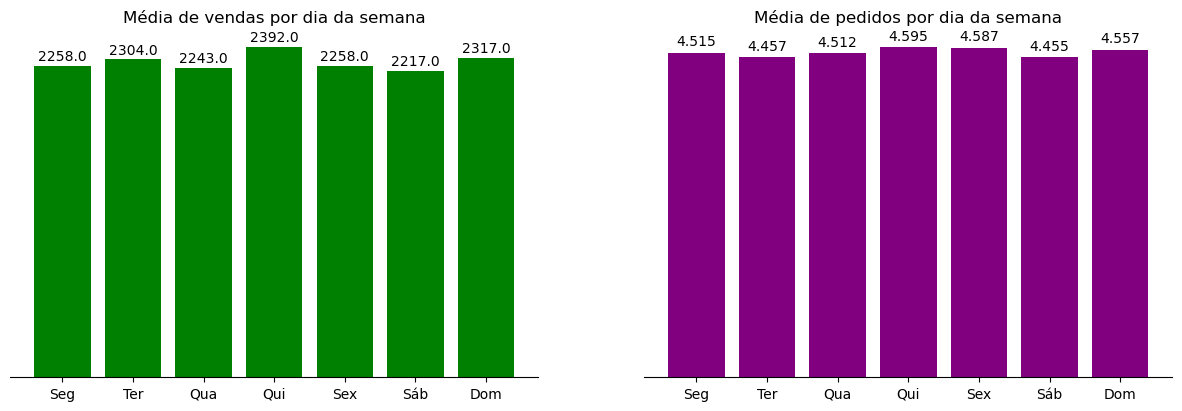

In [265]:
a = base2.groupby('Dia_Semana')['Unit Price'].mean().sort_index(ascending=True) # A documentação considera 0 segunda, 1 terça...
b = base2.groupby('Dia_Semana')['Order Quantity'].mean().sort_index(ascending=True) # Média Order Quantity

fig, ax = plt.subplots(ncols=2,figsize=(15,4.5))
ax[0].bar(a.index, a.values,color='green')
ax[0].set_xticklabels(['','Seg','Ter','Qua','Qui','Sex','Sáb','Dom'])
for i in range(0,len(a.index)):
    ax[0].annotate(round(a.values[i],0), (a.index[i],a.values[i]+40), ha='center')

ax[1].bar(b.index, b.values, color='purple')
ax[1].set_xticklabels(['','Seg','Ter','Qua','Qui','Sex','Sáb','Dom'])
for i in range(0,len(b.index)):
    ax[1].annotate(round(b.values[i],3), (b.index[i],b.values[i]+0.1), ha='center')

ax[0].spines[['top','right','left']].set_visible(False)
ax[1].spines[['top','right','left']].set_visible(False)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

ax[0].set_title('Média de vendas por dia da semana')
ax[1].set_title('Média de pedidos por dia da semana')
plt.show()

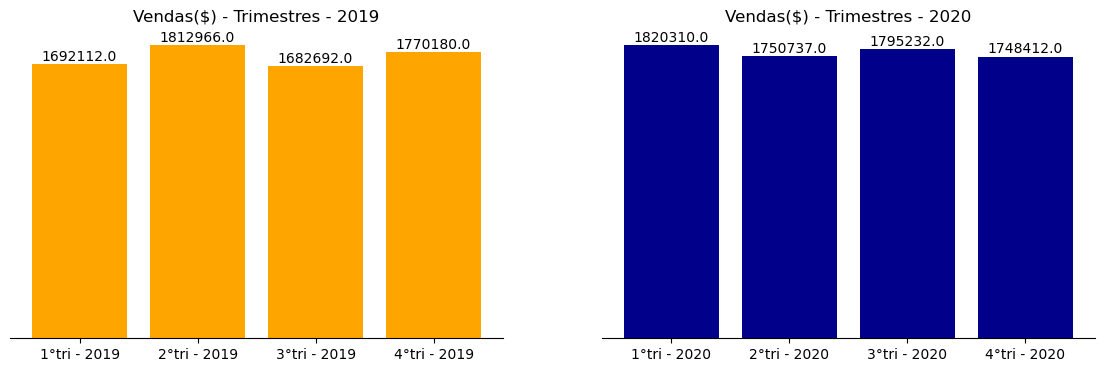

In [266]:
base2019 = base2.loc[base2.Ano == 2019]
base2020 = base2.loc[base2.Ano == 2020]
base2019['Trimestre'] = base2019.OrderDate.dt.quarter
base2020['Trimestre'] = base2020.OrderDate.dt.quarter

a = base2019.groupby('Trimestre')['Unit Price'].sum().sort_index()
b = base2020.groupby('Trimestre')['Unit Price'].sum().sort_index()

fig, ax = plt.subplots(ncols=2, figsize=(14,4))
ax[0].bar(a.index, a.values, color='orange')
for i in range(0,len(a.index)):
    ax[0].annotate(round(a.values[i],0), (a.index[i],a.values[i]+20000), ha='center')
ax[0].set_xticks([1,2,3,4])
ax[0].set_xticklabels(['1°tri - 2019', '2°tri - 2019', '3°tri - 2019','4°tri - 2019']);
ax[0].spines[['top','right','left']].set_visible(False)
ax[0].yaxis.set_visible(False)

ax[1].bar(b.index, b.values, color='darkblue')
for i in range(0,len(b.index)):
    ax[1].annotate(round(b.values[i],0), (b.index[i],b.values[i]+20000), ha='center')
ax[1].set_xticks([1,2,3,4])
ax[1].set_xticklabels(['1°tri - 2020', '2°tri - 2020', '3°tri - 2020','4°tri - 2020']);
ax[1].spines[['top','right','left']].set_visible(False)
ax[1].yaxis.set_visible(False)
ax[0].set_title('Vendas($) - Trimestres - 2019')
ax[1].set_title('Vendas($) - Trimestres - 2020')
plt.show()

In [267]:
df2 = base3.copy()
df2 = df2.set_index('OrderDate')
df2.head(3)

,Order Quantity,Unit Cost,Unit Price,Discount Applied,Trimestre
OrderDate,,,,,
2019-01-01,7,773.85,1031.8,0.050,1
2019-01-01,8,644.88,1172.5,0.075,1
2019-01-01,4,924.60,2010.0,0.075,1


### **Visualizando a tendência, sazonalidade e resíduo da coluna de preço unitário:**

In [268]:
df3 = pd.DataFrame(base2.groupby('OrderDate')['Unit Price','Order Quantity'].sum())
df3.head(3)

,Unit Price,Order Quantity
OrderDate,,
2018-05-31,15872.3,39
2018-06-01,31845.1,62
2018-06-02,23249.0,35


OBS: Período = 30

In [269]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df3['Unit Price'], period=30)

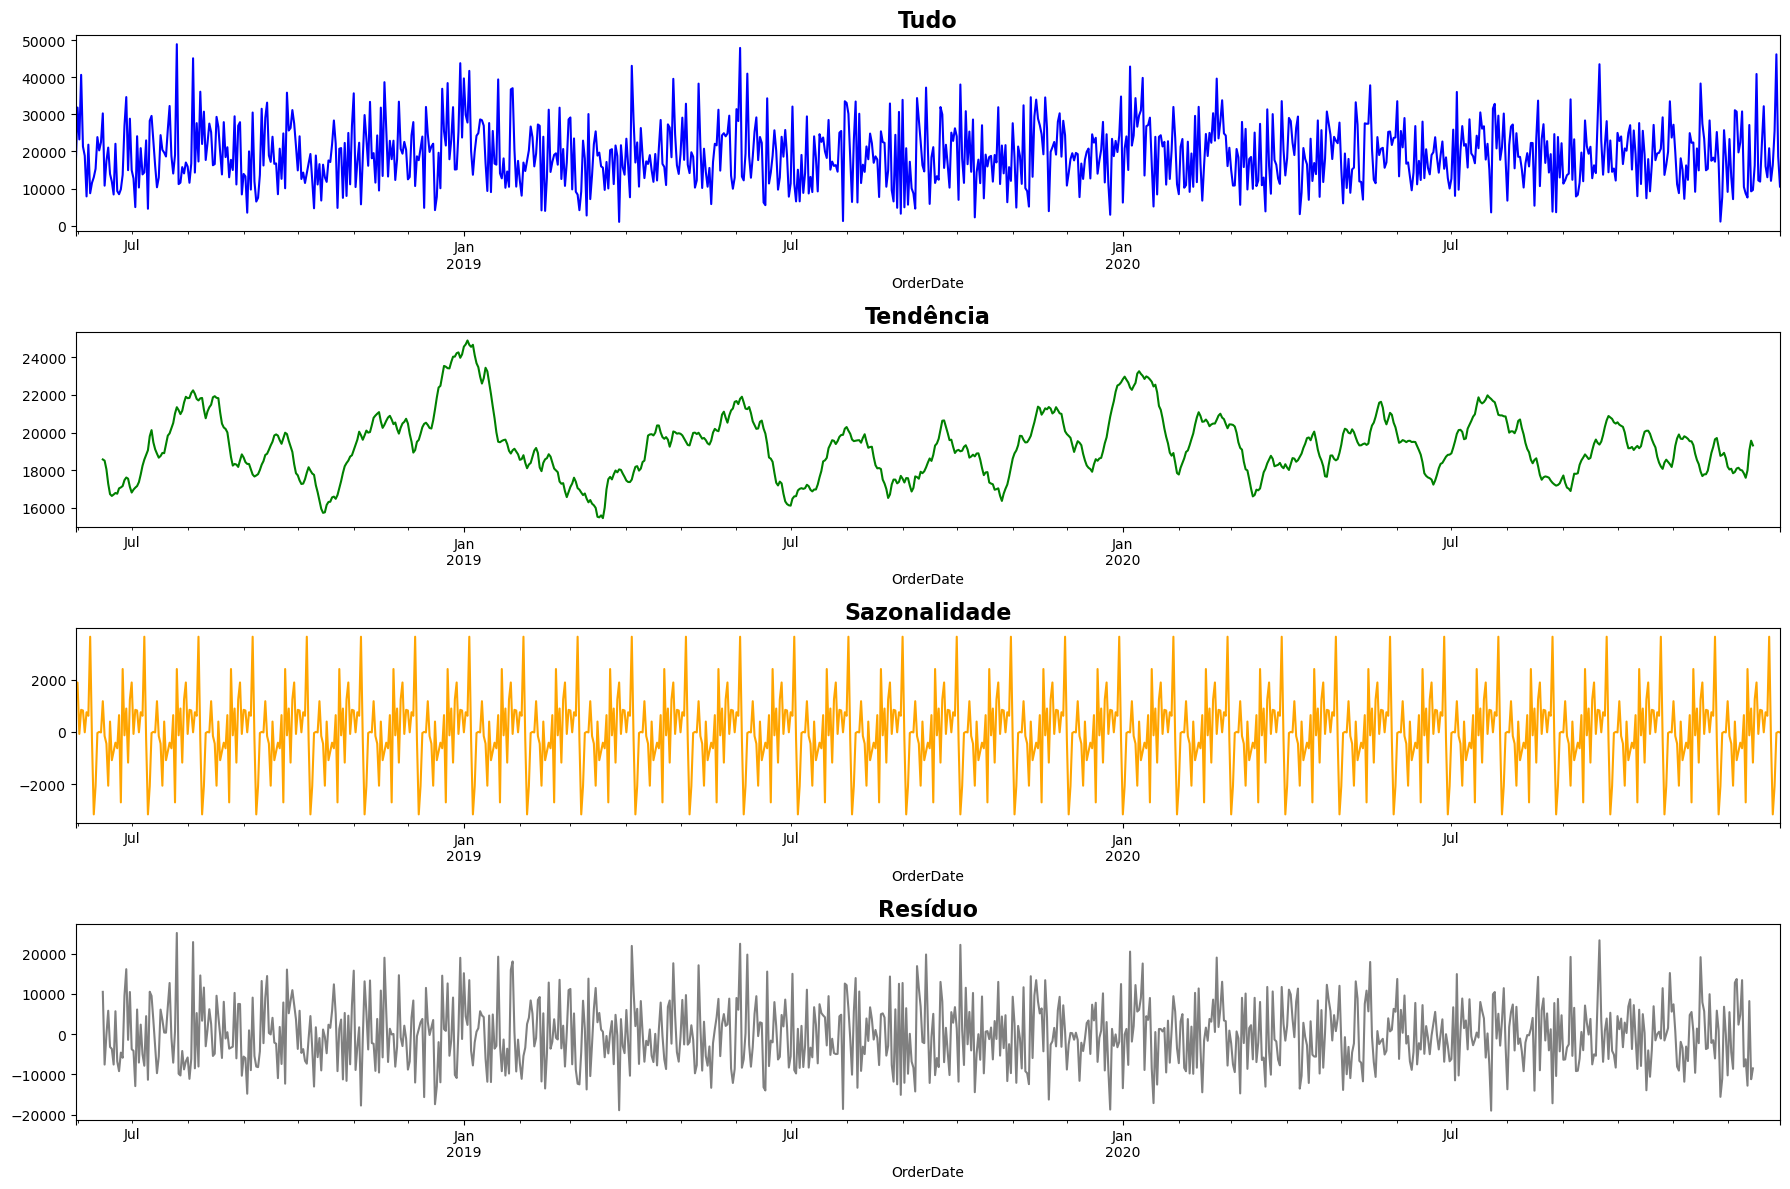

In [270]:
fig, ax = plt.subplots(nrows=4,figsize=(18,12))

result.observed.plot(ax=ax[0], color='blue')   # Tudo
result.trend.plot(ax=ax[1], color='green')      # Tendência
result.seasonal.plot(ax=ax[2], color='orange')   # Sazonalidade
result.resid.plot(ax=ax[3], color='gray')      # Resíduo
ax[0].set_title('Tudo', fontsize=16, fontweight='bold')
ax[1].set_title('Tendência', fontsize=16, fontweight='bold')
ax[2].set_title('Sazonalidade', fontsize=16, fontweight='bold')
ax[3].set_title('Resíduo', fontsize=16, fontweight='bold')

plt.tight_layout()

# **3. Análises dos times de vendas e armazéns**

### **Analisando os times de vendas que mais venderam por ordem de ID**

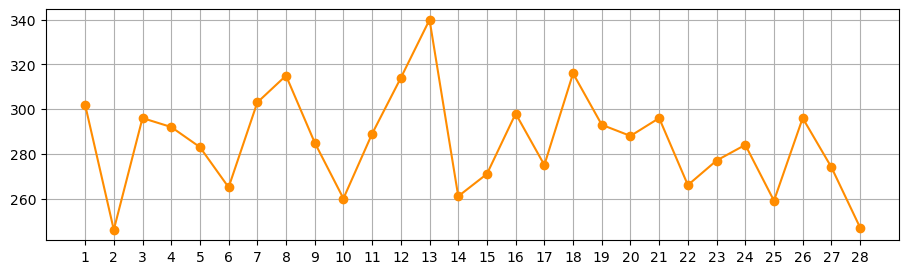

In [271]:
a = base.groupby("_SalesTeamID")['Unit Price'].count().sort_index()

fig, ax = plt.subplots(figsize=(11,3))
ax.plot(a.index, a.values,'o-', color='darkorange')
# ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(a.index)
ax.grid()
plt.show()

### **Em ordem crescente, os times que mais venderam ($)**

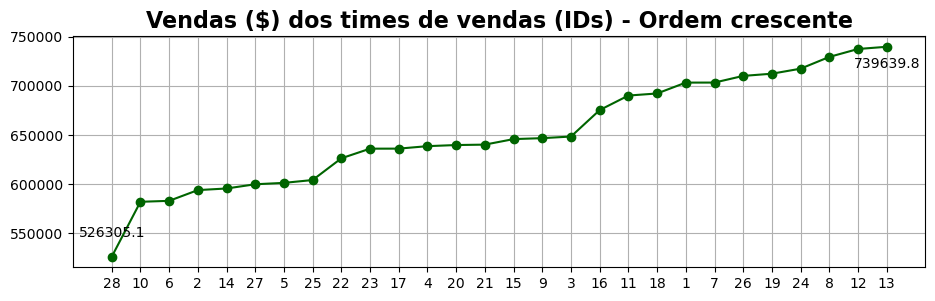

In [272]:
a = base.groupby("_SalesTeamID")['Unit Price'].sum().sort_values(ascending=True).reset_index()
a['_SalesTeamID'] = a['_SalesTeamID'].astype('str')
fig, ax = plt.subplots(figsize=(11,3))
ax.plot(a['_SalesTeamID'], a['Unit Price'],'o-', color='darkgreen')
# ax.spines[['top','left','right']].set_visible(False)
# ax.set_xticks(a.index)
ax.annotate(a['Unit Price'][0], (a['_SalesTeamID'][0],a['Unit Price'][0]+20000),ha='center')
ax.annotate(a['Unit Price'][27], (a['_SalesTeamID'][27],a['Unit Price'][27]-21500),ha='center')
ax.set_title('Vendas ($) dos times de vendas (IDs) - Ordem crescente', fontsize=16, fontweight='bold')
ax.grid()
plt.show()

### **Canais usados pelos Times de venda:**

In [273]:
sales_online = base.loc[base['Sales Channel'] == 'Online']
sales_in_store = base.loc[base['Sales Channel'] == 'In-Store']
sales_distributor = base.loc[base['Sales Channel'] == 'Distributor']
sales_wholesale = base.loc[base['Sales Channel'] == 'Wholesale']

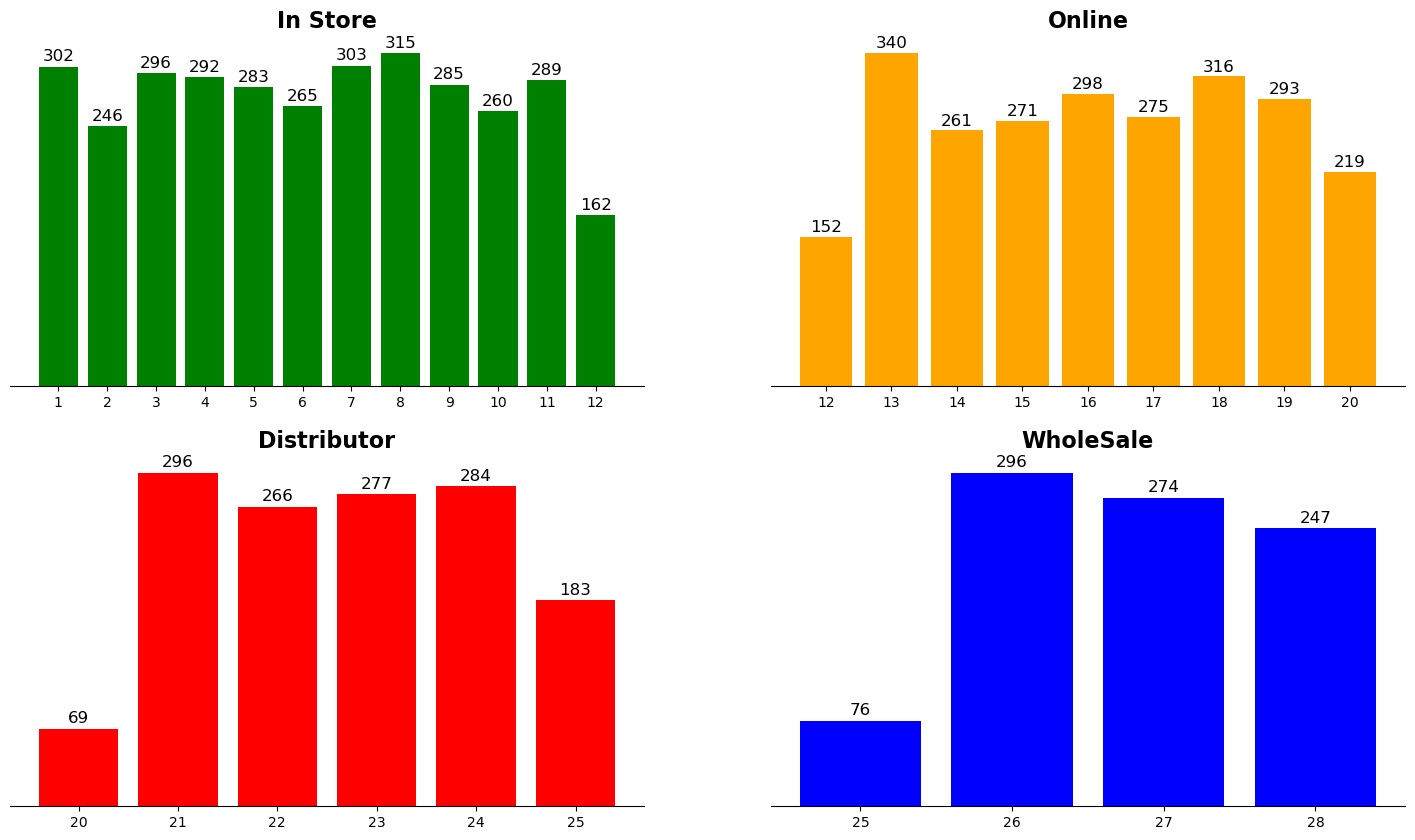

In [274]:
a = sales_in_store._SalesTeamID.value_counts().sort_index()
b = sales_online._SalesTeamID.value_counts().sort_index()
c = sales_distributor._SalesTeamID.value_counts().sort_index()
d = sales_wholesale._SalesTeamID.value_counts().sort_index()

fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(18,10))

ax[0][0].bar(a.index, a.values, color='green')
ax[0][1].bar(b.index, b.values, color='orange')
ax[1][0].bar(c.index, c.values, color='red')
ax[1][1].bar(d.index, d.values, color='blue')

ax[0][0].set_xticks(a.index)
ax[0][1].set_xticks(b.index)
ax[1][0].set_xticks(c.index)
ax[1][1].set_xticks(d.index)

ax[0][0].set_title('In Store', fontsize=16, fontweight='bold')
ax[0][1].set_title('Online', fontsize=16, fontweight='bold')
ax[1][0].set_title('Distributor', fontsize=16, fontweight='bold')
ax[1][1].set_title('WholeSale', fontsize=16, fontweight='bold')

for i in range(0,len(a.index)):
    ax[0][0].annotate(a.values[i], (a.index[i],a.values[i]+5),ha='center',fontsize=12)
for i in range(0,len(b.index)):
    ax[0][1].annotate(b.values[i], (b.index[i],b.values[i]+5),ha='center',fontsize=12)
for i in range(0,len(c.index)):
    ax[1][0].annotate(c.values[i], (c.index[i],c.values[i]+5),ha='center',fontsize=12)
for i in range(0,len(d.index)):
    ax[1][1].annotate(d.values[i], (d.index[i],d.values[i]+5),ha='center',fontsize=12)

ax[0][0].yaxis.set_visible(False)
ax[0][1].yaxis.set_visible(False)
ax[1][0].yaxis.set_visible(False)
ax[1][1].yaxis.set_visible(False)

ax[0][0].spines[['top','left','right']].set_visible(False)
ax[0][1].spines[['top','left','right']].set_visible(False)
ax[1][0].spines[['top','left','right']].set_visible(False)
ax[1][1].spines[['top','left','right']].set_visible(False)

plt.show()

**Geralmente os times de venda atuam em apenas 1 canal de venda, com exceção de alguns.**

### **Visualizando a atuação dos time de vendas por armazém**

In [275]:
base.WarehouseCode.unique()

array(['WARE-UHY1004', 'WARE-NMK1003', 'WARE-PUJ1005', 'WARE-XYS1001',
       'WARE-MKL1006', 'WARE-NBV1002'], dtype=object)

In [276]:
base_XYS1001 = base.loc[base.WarehouseCode == 'WARE-XYS1001']
base_NBV1002 = base.loc[base.WarehouseCode == 'WARE-NBV1002']
base_NMK1003 = base.loc[base.WarehouseCode == 'WARE-NMK1003']
base_UHY1004 = base.loc[base.WarehouseCode == 'WARE-UHY1004']
base_PUJ1005 = base.loc[base.WarehouseCode == 'WARE-PUJ1005']
base_MKL1006 = base.loc[base.WarehouseCode == 'WARE-MKL1006']

In [277]:
a = base_XYS1001._SalesTeamID.value_counts().sort_index()
b = base_NBV1002._SalesTeamID.value_counts().sort_index()
c = base_NMK1003._SalesTeamID.value_counts().sort_index()
d = base_UHY1004._SalesTeamID.value_counts().sort_index()
e = base_PUJ1005._SalesTeamID.value_counts().sort_index()
f = base_MKL1006._SalesTeamID.value_counts().sort_index()

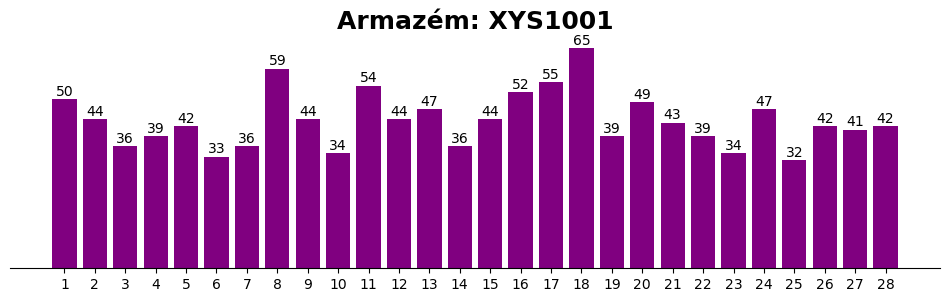

In [278]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(a.index, a.values, color='purple')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(a.index)
ax.yaxis.set_visible(False)
ax.set_title("Armazém: XYS1001", fontsize=18, fontweight='bold')
for i in range(0,len(a.index)):
    ax.annotate(a.values[i],(a.index[i], a.values[i]+1),ha='center')
plt.show()

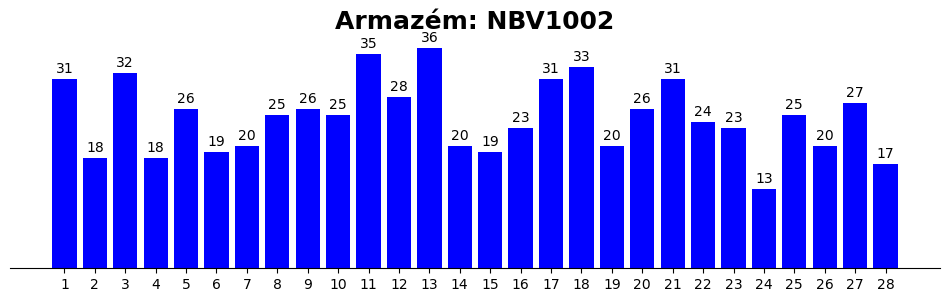

In [279]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(b.index, b.values, color='blue')
ax.set_title("Armazém: NBV1002", fontsize=18, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(b.index)
ax.yaxis.set_visible(False)
for i in range(0,len(b.index)):
    ax.annotate(b.values[i],(b.index[i], b.values[i]+1),ha='center')
plt.show()

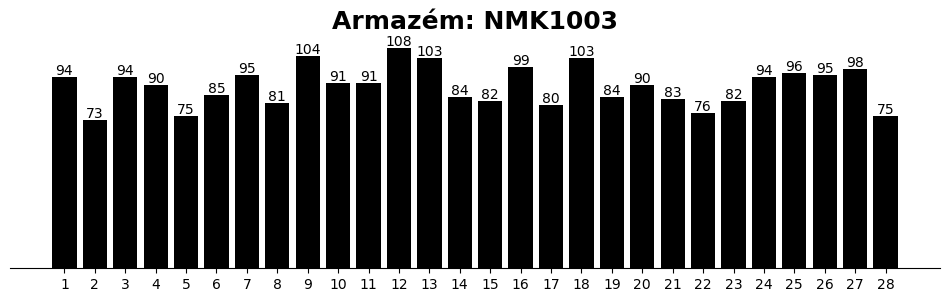

In [280]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(c.index, c.values, color='black')
ax.set_title("Armazém: NMK1003", fontsize=18, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(c.index)
ax.yaxis.set_visible(False)
for i in range(0,len(c.index)):
    ax.annotate(c.values[i],(c.index[i], c.values[i]+1),ha='center')
plt.show()

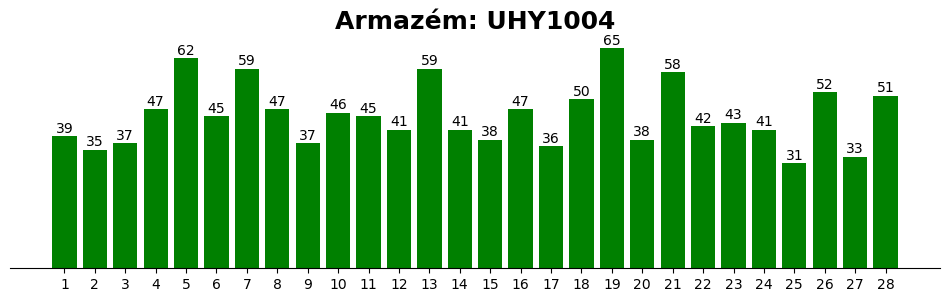

In [281]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(d.index, d.values, color='green')
ax.set_title("Armazém: UHY1004", fontsize=18, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(d.index)
ax.yaxis.set_visible(False)
for i in range(0,len(d.index)):
    ax.annotate(d.values[i],(d.index[i], d.values[i]+1),ha='center')
plt.show()

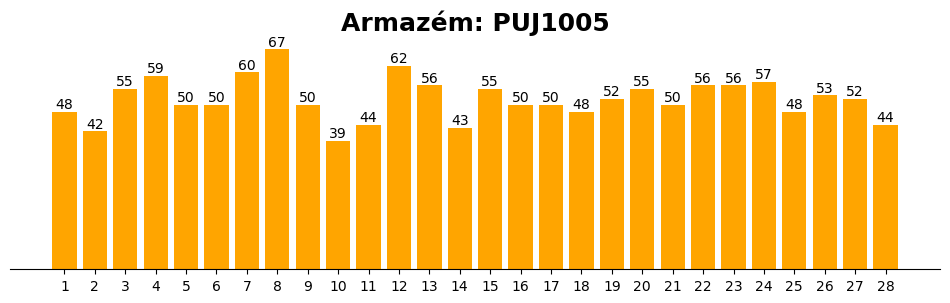

In [282]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(e.index, e.values, color='orange')
ax.set_title("Armazém: PUJ1005", fontsize=18, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(e.index)
ax.yaxis.set_visible(False)
for i in range(0,len(a.index)):
    ax.annotate(e.values[i],(e.index[i], e.values[i]+1),ha='center')
plt.show()

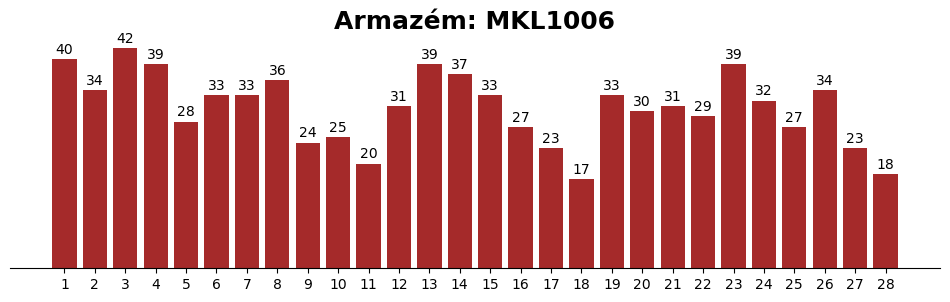

In [283]:
fig,ax = plt.subplots(figsize=(12,3))
ax.bar(f.index, f.values, color='brown')
ax.set_title("Armazém: MKL1006", fontsize=18, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticks(f.index)
ax.yaxis.set_visible(False)
for i in range(0,len(f.index)):
    ax.annotate(f.values[i],(f.index[i], f.values[i]+1),ha='center')
plt.show()

### **Análise Descritiva: Resumo sobre produtos, equipes e canais de vendas:**


### **Produtos:**
- Os 5 ID's **mais frequentes** nos pedidos: 37, 4, 8, 23, 27
- Os 5 ID's **menos frequentes** nos pedidos: 44, 32, 42, 47, 34
- Os 5 ID's que **mais geraram dinheiro**: 4, 23, 37, 40, 5
- Os 5 ID's que **menos geraram dinheiro**: 44, 32, 42, 34, 1
- Os 5 ID's **mais vendidos (quantidade)**: 23, 37, 8, 4, 40
- Os 5 ID's **menos vendidos (quantidade)**: 44, 34, 18, 42, 30


### **Equipe de vendas**:
- As 5 equipes com com **maiores valores de vendas no total**: 13, 12, 8, 24, 19
- As 5 equipes com com **menores valores de vendas no total**: 28, 10, 6, 2, 14
- As 5 equipes **mais presentes nos pedidos**: 13, 18, 8, 12, 7
- As 5 equipes **menos presentes nos pedidos**: 2, 28, 25, 10, 14


### **Equipes e canais de vendas**:
- Equipes de venda do **ID 1 a 12** atuaram no canal **"In Store"**
- Equipes de venda do **ID 12 a 20** atuaram no canal **"Online"**
- Equipes de venda do **ID 20 a 25** atuaram no canal **"Distributor"**
- Equipes de venda do **ID 25 a 28** atuaram no canal **"WholeSale"**
- Apenas as equipes **12, 20 e 25** estão **presentes em 2 canais** de vendas.

In [284]:
# Mudand o índice do DataFrame
base.index = base.OrderDate

# **4. Análise dos lucros**

- **Unit Price** - é o preço vendido no mercado.
- **Unit cost** - é o custo de produção.
- **Order Quantity** - é o número de produtos no pedido.
- **Discount Applied** - é desconto aplicado no total.

In [285]:
base['Lucro'] = (base['Unit Price'] * base['Order Quantity']) * (1-base['Discount Applied']) - (base['Unit Cost'] * base['Order Quantity'])

In [286]:
base.head().head(3)

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Tempo de envio do produto,Lucro
OrderDate,,,,,,,,,,,,,,,,
2018-05-31,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001.18,1963.1,14,4073.4375
2018-05-31,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3348.66,3939.6,22,886.4100
2018-05-31,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781.22,1775.5,21,905.5050


### **Times de vendas que mais trouxeram lucro**

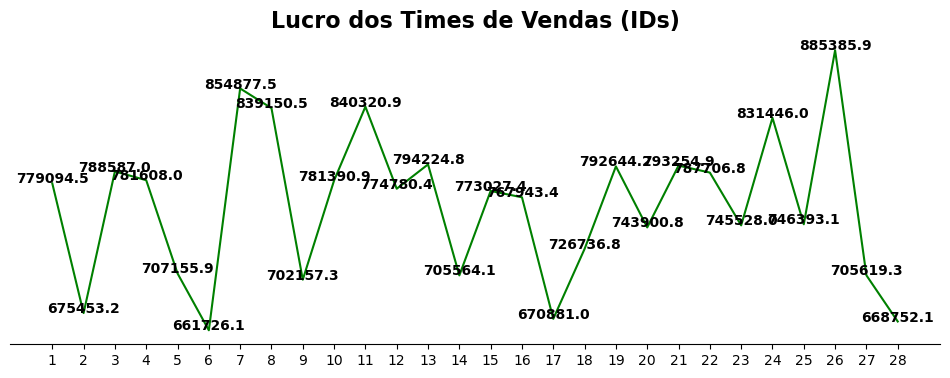

In [287]:
lucro_times = base.groupby('_SalesTeamID')['Lucro'].sum().sort_index(ascending=True).reset_index()
lucro_times.columns = ['_SalesTeamID','Lucro total']

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(lucro_times['_SalesTeamID'], lucro_times['Lucro total'], color='green')
ax.set_xticks(range(1,29))
ax.yaxis.set_visible(False)
ax.set_title("Lucro dos Times de Vendas (IDs)", fontsize=16, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
for i in np.arange(0,28):
    ax.annotate(round(lucro_times['Lucro total'][i],1), (lucro_times['_SalesTeamID'][i],lucro_times['Lucro total'][i]), ha='center',fontweight='bold')
plt.show()

### **Visualizando mínimo, máximo e média dos lucros**

In [288]:
print("Valor mínimo:", base['Lucro'].min())
print("Lucro máximo:", base['Lucro'].max())
print("Lucro médio:", base['Lucro'].mean())
print("Mediana do lucro:", base['Lucro'].median())

Valor mínimo: -12167.2
Lucro máximo: 26384.600000000002
Lucro médio: 2668.6661074959334
Mediana do lucro: 1544.2650000000003


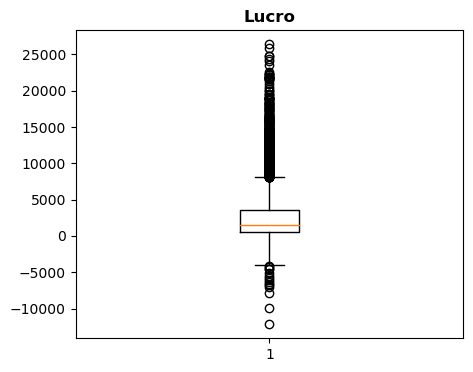

In [289]:
fig, ax = plt.subplots(figsize=(5,4))
ax.boxplot(base['Lucro'])
ax.set_title('Lucro',fontweight='bold')
plt.show()

Acima podemos notar que há outliers.

### **Visualizando os lucros em um histograma**

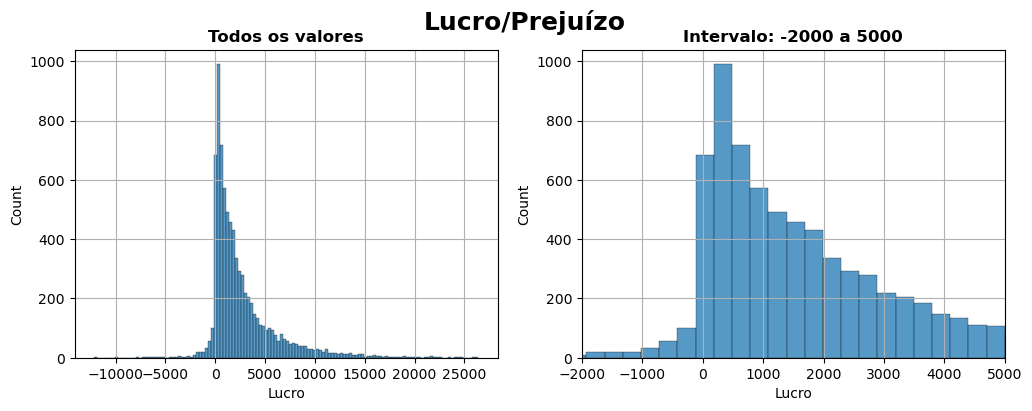

In [290]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

sns.histplot(base['Lucro'],ax=ax[0])
ax[0].set_title("Todos os valores", fontweight='bold')
ax[0].grid()

sns.histplot(base['Lucro'],ax=ax[1])
ax[1].set_xlim(-2000,5000)
ax[1].set_title("Intervalo: -2000 a 5000", fontweight='bold')
ax[1].grid()

plt.suptitle('Lucro/Prejuízo', fontsize = 18, fontweight='bold')
plt.show()

In [291]:
base['Tempo de entrega (total)'] = (base['DeliveryDate'] - base['OrderDate']).dt.days
base.head(3)

,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Tempo de envio do produto,Lucro,Tempo de entrega (total)
OrderDate,,,,,,,,,,,,,,,,,
2018-05-31,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001.18,1963.1,14,4073.4375,19
2018-05-31,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3348.66,3939.6,22,886.4100,32
2018-05-31,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781.22,1775.5,21,905.5050,31


In [292]:
base_insights_lucro = base[['OrderDate','Sales Channel','_SalesTeamID','_StoreID','_ProductID',"Lucro",'Discount Applied','Tempo de envio do produto','Tempo de entrega (total)']].reset_index(drop=True)
base_insights_lucro.head(3)

,OrderDate,Sales Channel,_SalesTeamID,_StoreID,_ProductID,Lucro,Discount Applied,Tempo de envio do produto,Tempo de entrega (total)
0,2018-05-31,In-Store,6,259,12,4073.4375,0.075,14,19
1,2018-05-31,Online,14,196,27,886.4100,0.075,22,32
2,2018-05-31,Distributor,21,213,16,905.5050,0.050,21,31


### **Visualizando o lucro ao longo do tempo**

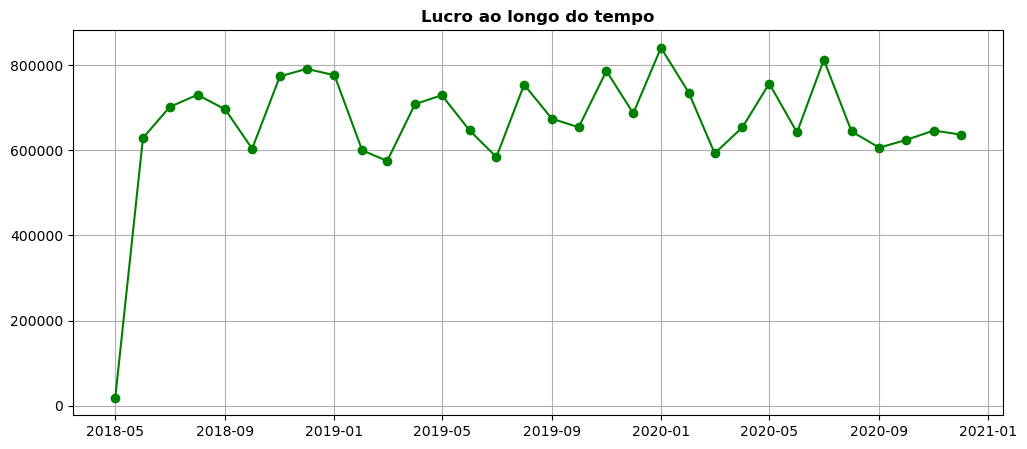

In [293]:
base_insights_lucro['Mês-Ano'] = base_insights_lucro['OrderDate'].dt.to_period('M')
a = base_insights_lucro.groupby('Mês-Ano')['Lucro'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,5))
valores_mes_ano = a['Mês-Ano'].dt.to_timestamp().values
ax.plot(valores_mes_ano, a['Lucro'], marker='o', linestyle='-', color='green')
ax.grid()
ax.set_title("Lucro ao longo do tempo", fontweight='bold')
plt.show()

Porém, ao analisar a base, notamos que alguns produtos estão com valores negativos na coluna de lucro, significando que trouxe prejuízo em alguns pedidos. Vamos analisar:

In [294]:
base_insights_lucro.loc[base_insights_lucro['Lucro'] < 0].head(3)

,OrderDate,Sales Channel,_SalesTeamID,_StoreID,_ProductID,Lucro,Discount Applied,Tempo de envio do produto,Tempo de entrega (total),Mês-Ano
13,2018-06-01,In-Store,8,291,32,-2.273737e-13,0.15,6,14,2018-06
20,2018-06-01,Wholesale,25,193,33,-1.549040e+03,0.40,17,19,2018-06
58,2018-06-06,Online,14,60,1,-1.715200e+02,0.40,25,28,2018-06


**Criando coluna extra com essa informação**

In [295]:
base_insights_lucro['Prejuízo'] = base_insights_lucro['Lucro'].apply(lambda x:1 if x < 0 else 0)

In [296]:
print(base_insights_lucro.loc[base_insights_lucro['Lucro'] < 0,'Prejuízo'].value_counts())
print(base_insights_lucro.loc[base_insights_lucro['Lucro'] > 0,'Prejuízo'].value_counts())

1    373
Name: Prejuízo, dtype: int64
0    7591
Name: Prejuízo, dtype: int64


### **Base com as vendas que não trouxeram lucro**

In [297]:
base_preju = base_insights_lucro.loc[base_insights_lucro['Prejuízo'] == 1]
base_preju['Sales Channel'].value_counts()

In-Store       156
Online         111
Distributor     59
Wholesale       47
Name: Sales Channel, dtype: int64

**Analisando os descontos**

In [298]:
def transformar_float(x):
    v = float("{:f}".format(x))
    return v
base_preju['Valor do prejuízo'] = base_preju['Lucro'].apply(transformar_float)
base_preju.head()

,OrderDate,Sales Channel,_SalesTeamID,_StoreID,_ProductID,Lucro,Discount Applied,Tempo de envio do produto,Tempo de entrega (total),Mês-Ano,Prejuízo,Valor do prejuízo
13,2018-06-01,In-Store,8,291,32,-2.273737e-13,0.15,6,14,2018-06,1,-0.00
20,2018-06-01,Wholesale,25,193,33,-1.549040e+03,0.40,17,19,2018-06,1,-1549.04
58,2018-06-06,Online,14,60,1,-1.715200e+02,0.40,25,28,2018-06,1,-171.52
59,2018-06-07,In-Store,11,238,20,-7.785500e+02,0.30,7,9,2018-06,1,-778.55
88,2018-06-11,Online,13,249,8,-1.976500e+03,0.40,2,5,2018-06,1,-1976.50


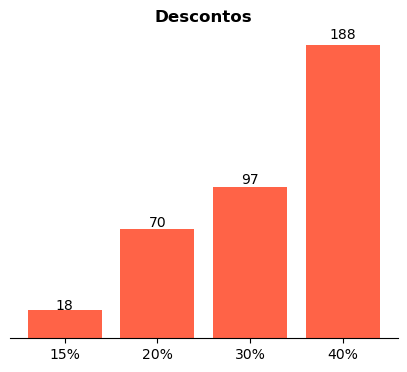

In [299]:
a = base_preju['Discount Applied'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(a.index.astype(str), a.values, color='tomato')
ax.set_title('Descontos', fontweight='bold')
ax.yaxis.set_visible(False)
for i in np.arange(0, len(a.index)):
    ax.annotate(a.values[i],(i,a.values[i]+a.values[i]*0.02), ha='center')
ax.spines[['top','left','right']].set_visible(False)
ax.set_xticklabels(['15%','20%','30%','40%'])
plt.show()

Um fator curiodo é que 188 desses pedidos tiveram 40% de desconto, valor que é alto quanto comparados com os outros. Nessa base de prejuízos, podemos ver que conforme o disconto aumenta, a quantidade de prejuízos também aumenta.

### **Abaixo vemos também que quanto maior foi o desconto, maior foram os intervalos dos prejuízos**

In [300]:
base_preju.groupby('Discount Applied')['Valor do prejuízo'].mean()

Discount Applied
0.15      -0.011389
0.20    -277.175143
0.30    -921.294124
0.40   -1263.103191
Name: Valor do prejuízo, dtype: float64

In [301]:
base_preju.groupby('Discount Applied')['Valor do prejuízo'].median()

Discount Applied
0.15     -0.0125
0.20   -189.7000
0.30   -479.7200
0.40   -709.9200
Name: Valor do prejuízo, dtype: float64

**Isso quer dizer que altos descontos trarão prejuízo ao negócio? Não necessariamente, mas isso deve ser analisado pelos responsáveis pelas elaborações dos preços, para que se analise o preço de produção, e assim, escolher o valor adequado da venda final.**


Analisando os descontos

In [302]:
print("Casos de produtos com 15% de desconto e prejuízo: ", base.loc[(base['Discount Applied'] == 0.15) & (base['Lucro'] < 0)].shape[0])
print("Casos de produtos com 15% de desconto e lucro: ", base.loc[(base['Discount Applied'] == 0.15) & (base['Lucro'] > 0)].shape[0])

print("Casos de produtos com 20% de desconto e prejuízo: ", base.loc[(base['Discount Applied'] == 0.20) & (base['Lucro'] < 0)].shape[0])
print("Casos de produtos com 20% de desconto e lucro: ", base.loc[(base['Discount Applied'] == 0.20) & (base['Lucro'] > 0)].shape[0])

print("Casos de produtos com 30% de desconto e prejuízo: ", base.loc[(base['Discount Applied'] == 0.30) & (base['Lucro'] < 0)].shape[0])
print("Casos de produtos com 30% de desconto e lucro: ", base.loc[(base['Discount Applied'] == 0.30) & (base['Lucro'] > 0)].shape[0])

print("Casos de produtos com 40% de desconto e prejuízo: ", base.loc[(base['Discount Applied'] == 0.40) & (base['Lucro'] < 0)].shape[0])
print("Casos de produtos com 40% de desconto e lucro: ", base.loc[(base['Discount Applied'] == 0.40) & (base['Lucro'] > 0)].shape[0])

Casos de produtos com 15% de desconto e prejuízo:  18
Casos de produtos com 15% de desconto e lucro:  933
Casos de produtos com 20% de desconto e prejuízo:  70
Casos de produtos com 20% de desconto e lucro:  584
Casos de produtos com 30% de desconto e prejuízo:  97
Casos de produtos com 30% de desconto e lucro:  220
Casos de produtos com 40% de desconto e prejuízo:  188
Casos de produtos com 40% de desconto e lucro:  155


# **5. Função para pesquisar produtos**

In [303]:
def analisar_produto(id):
    base1 = base.loc[base._ProductID == id]
    fig, ax = plt.subplots(nrows=2,figsize=(16,7))
    a = base.groupby(base.index)['Lucro'].sum()  
    b = base.groupby(base.index)['Order Quantity'].sum()
    ax[0].plot(a.index, a.values, color='darkgreen')
    ax[1].plot(b.index, b.values, color='darkblue')
    ax[0].grid()
    ax[1].grid()
    ax[0].set_title('Lucro com as vendas', fontweight='bold')
    ax[1].set_title('Quantidade de produtos vendidos', fontweight='bold')

    fig, ax = plt.subplots(ncols=2, figsize=(12,4))
    c = base1['WarehouseCode'].value_counts().sort_index()
    d = base1['Sales Channel'].value_counts().sort_index()
    ax[0].bar(c.index, c.values, color='grey')
    ax[1].bar(d.index, d.values, color='grey')

    maior = c.values.max()
    id_max = []
    for i in range(0,len(c.index)):
        if c.values[i] == maior:
            id_max.append(i)
    ax[0].bar(id_max, maior, color='orange')

    maior2 = d.values.max()
    id_max = []
    for i in range(0,len(d.index)):
        if d.values[i] == maior2:
            id_max.append(i)
    ax[1].bar(id_max, maior2, color='orange')


    ax[0].spines[['top','left', 'right']].set_visible(False)
    ax[1].spines[['top','left', 'right']].set_visible(False)
    ax[0].set_title('Armazéns que enviaram o produto (Qtd)', fontweight='bold')
    ax[1].set_title('Número de vendas por canal', fontweight='bold')
    ax[0].set_xticklabels(c.index, rotation=25)
    ax[0].yaxis.set_visible(False)
    ax[1].yaxis.set_visible(False)

    for i in range(0,len(c.index)):
        ax[0].annotate(c.values[i],(c.index[i],c.values[i]+c.values[i]*0.025),ha='center')
    for i in range(0,len(d.index)):
        ax[1].annotate(d.values[i],(d.index[i],d.values[i]+d.values[i]*0.025),ha='center')

    plt.show()

Produtos disponíveis para análise:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
 
Digite o ID de um produto, para análise completa: 10


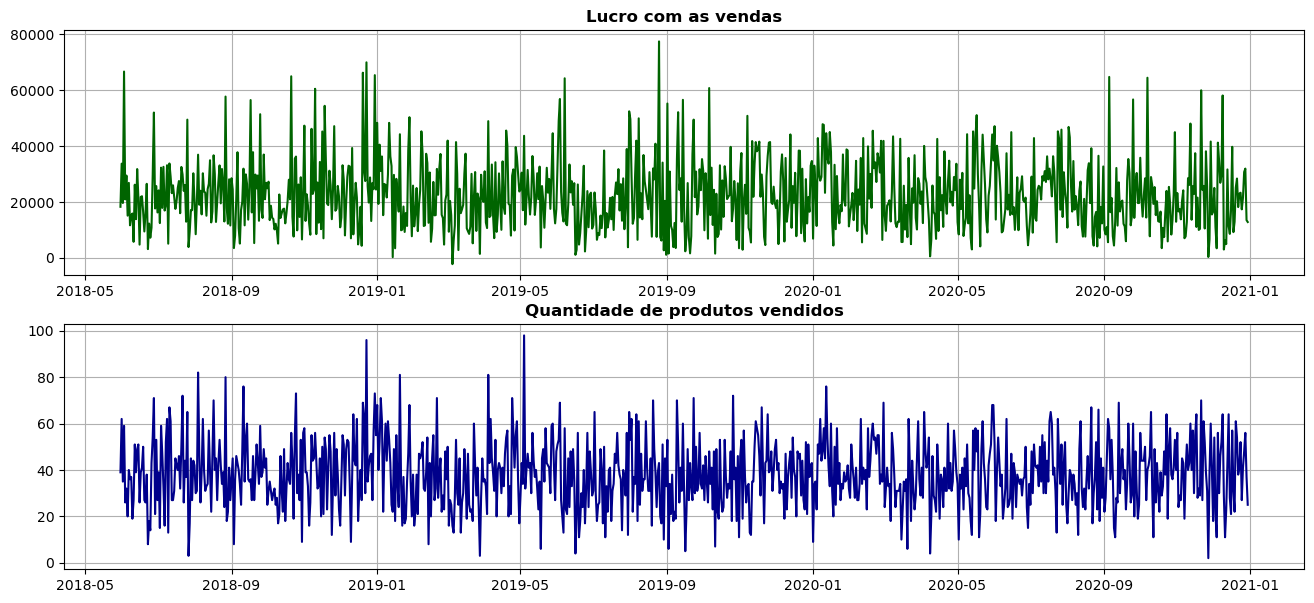

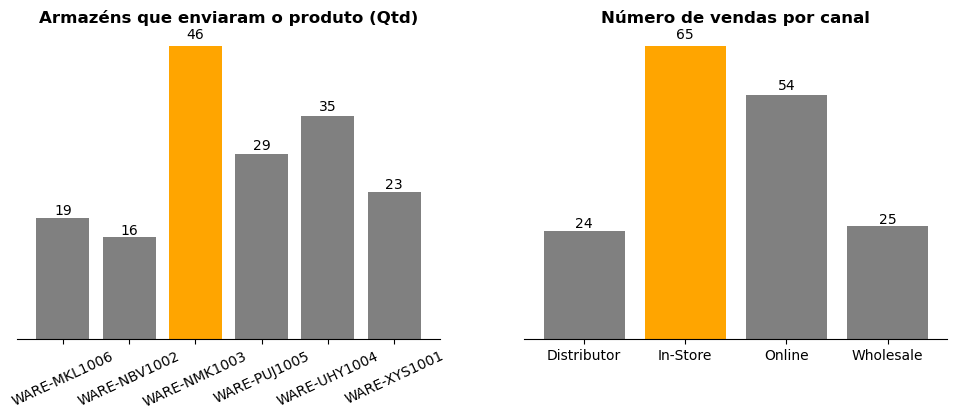

In [304]:
produtos = np.sort(base._ProductID.unique())
print("Produtos disponíveis para análise: ",produtos)
print(' ')
id_prod = int(input('Digite o ID de um produto, para análise completa: '))
analisar_produto(id_prod)